# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [46]:
# Try loading one file

df = pd.read_parquet('/Users/prajakta.p/Documents/Upgrad/Datasets/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [361]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0           3.99   
1  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0           4.79   
2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0           1.05   
3  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0           2.08   
4  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0           0.40   

   RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
0         1.0                  N           148            50             1   
1         1.0                  N           231            61             1   
2         1.0                  N           161           161             1   
3         1.0                  N           137           144             1   
4         1.0                  N            68            68             1   

   fare_amount  ...  congestion_surcharge  airport_fee  trip_duration  \
0        23.30  ...                   2.5          0.0      22.350000   
1        22.43  ...                   2.5          0.0      23.116667   
2        10.70  ...                   2.5          0.0      10.633333   
3        17.22  ...                   2.5          0.0      13.783333   
4         5.10  ...                   2.5          0.0       3.166667   

   OBJECTID  Shape_Leng  Shape_Area                  zone  LocationID  \
0     148.0    0.039131    0.000070       Lower East Side       148.0   
1     231.0    0.063420    0.000167  TriBeCa/Civic Center       231.0   
2     161.0    0.035804    0.000072        Midtown Center       161.0   
3     137.0    0.046108    0.000116              Kips Bay       137.0   
4      68.0    0.049337    0.000111          East Chelsea        68.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  Manhattan  POLYGON ((981667.364 203305, 981854.109 203130...  
2  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  
3  Manhattan  POLYGON ((991954.728 209026.462, 991949.076 20...  
4  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...  

[5 rows x 26 columns]

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/prajakta.p/Documents/Upgrad/Datasets/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file (respective month) 

        curr_file= pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        #Convert the pickup and dropoff datetime columns to datetime format
        curr_file['tpep_pickup_datetime'] = pd.to_datetime(curr_file['tpep_pickup_datetime'],errors='coerce')
        curr_file['tpep_dropoff_datetime'] = pd.to_datetime(curr_file['tpep_dropoff_datetime'],errors='coerce')

        # Loop through dates and then loop through every hour of each date

        # Iterate through each date in the current file
        for dates in curr_file['tpep_pickup_datetime'].dt.date.unique():   
            
            # Iterate through each hour of the selected date
            for hour in curr_file.loc[curr_file['tpep_pickup_datetime'].dt.date==dates, 'tpep_pickup_datetime'].dt.hour.unique():

                # Sample 1% of the hourly data with random_state=45
                # Note: The random_state parameter is used to ensure that the sampling is reproducible

                sampled_hour_data=curr_file[(curr_file['tpep_pickup_datetime'].dt.date==dates) & (curr_file['tpep_pickup_datetime'].dt.hour==hour)].sample(frac=0.01, random_state=45)

                # add data of this hour to the dataframe and ignore the index
                #Ensures that the index is reset after each append

                sampled_data = pd.concat([sampled_data, sampled_hour_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [5]:
# Store the df in csv/parquet
df.to_csv('/Users/prajakta.p/Documents/Upgrad/Datasets/Taxi-EDA.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [308]:
# Load the new data file
df=pd.read_csv('/Users/prajakta.p/Documents/Upgrad/Datasets/Taxi-EDA.csv')


In [291]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
1         2  2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2  2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
3         2  2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
4         2  2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.10         1.0                  N           238           236   
1           1.91         1.0                  N            79           170   
2           5.13         1.0                  N           163           166   
3           2.29         1.0                  N            87            79   
4           0.84         1.0                  N           100           230   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          7.9    1.0      0.5        1.94           0.0   
1             1         11.4    1.0      0.5        3.28           0.0   
2             1         24.7    1.0      0.5        0.30           0.0   
3             1         15.6    1.0      0.5        4.12           0.0   
4             1          7.9    1.0      0.5        3.23           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         14.84                   2.5          0.0   
1                    1.0         19.68                   2.5          0.0   
2                    1.0         30.00                   2.5          0.0   
3                    1.0         24.72                   2.5          0.0   
4                    1.0         16.13                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369799 entries, 0 to 369798
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   369799 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  369799 non-null  datetime64[ns]
 2   passenger_count        369799 non-null  float64       
 3   trip_distance          369799 non-null  float64       
 4   RatecodeID             369799 non-null  float64       
 5   store_and_fwd_flag     369799 non-null  object        
 6   PULocationID           369799 non-null  int64         
 7   DOLocationID           369799 non-null  int64         
 8   payment_type           369799 non-null  int64         
 9   fare_amount            369799 non-null  float64       
 10  extra                  369799 non-null  float64       
 11  mta_tax                369799 non-null  float64       
 12  tip_amount             369799 non-null  floa

In [360]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [309]:
# Fix the index and drop any columns that are not needed
df.set_index('VendorID', inplace=True)

df.info

<bound method DataFrame.info of          tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   
...                       ...                   ...              ...   
2         2023-06-30 22:33:00   2023-07-01 22:25:51              1.0   
2         2023-06-30 22:55:17   2023-06-30 23:07:29              1.0   
2         2023-06-30 22:30:54   2023-06-30 22:38:13              3.0   
2         2023-06-30 22:55:35   2023-06-30 23:10:50              1.0   
2         2023-06-30 22:28:22   2023-06-30 22:34:30              1.0   

          trip_distance  Rateco

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [310]:

df['airport_fee'].value_counts()



airport_fee
0.00    26955
1.25     2639
Name: count, dtype: int64

In [311]:
# Combine the two airport fee columns
#Fill the missing values in the 'airport_fee' column with the mode
df['airport_fee']=df['airport_fee'].fillna(df['airport_fee'].mode()[0]) + df['Airport_fee'].fillna(df['Airport_fee'].mode()[0])

# Drop the unnecessary column
df.drop('Airport_fee', axis=1, inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [312]:
# check where values of fare amount are negative

df[df['fare_amount']<0].shape

#No negative fare in this df

(0, 18)

Did you notice something different in the `RatecodeID` column for above records?

In [313]:
# Analyse RatecodeID for the negative fare amounts
df[df['RatecodeID']<0].shape

#No negative RatecodeID in this df


(0, 18)

In [314]:
# Find which columns have negative values
negative_columns = df.select_dtypes(include='number').columns[(df.select_dtypes(include='number') < 0).any()]

negative_columns


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [315]:
# fix these negative values
for column in negative_columns:
    #Find the percentage of negative values in the column
    negative_percentage = (df[column] < 0).mean() * 100

    print(negative_percentage)

    #Since very less negative values are present in the columns, we can treat them as missing values

    df[column] = df[column].where(df[column] >= 0, np.nan)   
    
# Find negative values columns again
negative_columns = df.select_dtypes(include='number').columns[(df.select_dtypes(include='number') < 0).any()]

negative_columns

0.0007909973949819125
0.004745984369891475
0.004745984369891475
0.004745984369891475
0.002900323781600346
0.0007909973949819125


Index([], dtype='object')

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [316]:
# Find the proportion of missing values in each column
df.isna().mean() * 100


tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.799424
trip_distance            0.000000
RatecodeID               3.799424
store_and_fwd_flag       3.799424
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000791
mta_tax                  0.004746
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.004746
total_amount             0.004746
congestion_surcharge     3.802324
airport_fee              0.000791
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [317]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].isna().sum()

print(df['passenger_count'].mode())

# Impute NaN values in 'passenger_count' with mode since data is discrete 
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

# Check if there are any NaN values left in 'passenger_count'
df['passenger_count'].isna().sum()


0    1.0
Name: passenger_count, dtype: float64


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/3091773517.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)


0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [318]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isna().sum()

print(df['RatecodeID'].mode())


# Impute NaN values in 'RatecodeID' with mode since data is categorical 
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

# Check the missing values again
df['RatecodeID'].isna().sum()


0    1.0
Name: RatecodeID, dtype: float64


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1350851073.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [319]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].isna().sum()

print(df['congestion_surcharge'].median())

# Impute NaN values in 'congestion_surcharge' with median since data is continuous
# Note: The median is used instead of the mean to avoid the influence of outliers
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

# Check the missing values again
df['congestion_surcharge'].isna().sum()


2.5


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/920626911.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [320]:
# Handle any remaining missing values

#handle null values in store_and_fwd_flag

#Since the column is categorical, we can impute the missing values with mode
df['store_and_fwd_flag'].isna().sum()

print(df['store_and_fwd_flag'].mode())
# Impute NaN values in 'store_and_fwd_flag' with mode since data is categorical
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)


0    N
Name: store_and_fwd_flag, dtype: object


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/604475763.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)


In [216]:
df.isna().mean() * 100

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000791
mta_tax                  0.004746
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.004746
total_amount             0.004746
congestion_surcharge     0.000000
airport_fee              0.000791
dtype: float64

In [321]:
#extra , mta_tax,improvement_surcharge, total_amount,airport_fee have very less missing values <<1%
#we can drop these rows
df.dropna(subset=['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'airport_fee'], inplace=True)

In [218]:
df

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   
...                       ...                   ...              ...   
2         2023-06-30 22:33:00   2023-07-01 22:25:51              1.0   
2         2023-06-30 22:55:17   2023-06-30 23:07:29              1.0   
2         2023-06-30 22:30:54   2023-06-30 22:38:13              3.0   
2         2023-06-30 22:55:35   2023-06-30 23:10:50              1.0   
2         2023-06-30 22:28:22   2023-06-30 22:34:30              1.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   
...                 ...         ...                ...           ...   
2                  3.04         1.0                  N           238   
2                  1.83         1.0                  N           230   
2                  0.81         1.0                  N           230   
2                  4.01         1.0                  N            79   
2                  0.68         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
VendorID                                                                        
2                  236             1          7.9    1.0      0.5        1.94   
2                  170             1         11.4    1.0      0.5        3.28   
2                  166             1         24.7    1.0      0.5        0.30   
2                   79             1         15.6    1.0      0.5        4.12   
2                  230             1          7.9    1.0      0.5        3.23   
...                ...           ...          ...    ...      ...         ...   
2                   74             1         19.1    1.0      0.5        3.62   
2                  234             1         12.8    1.0      0.5        3.56   
2                   48             1          8.6    1.0      0.5        0.00   
2                  140             1         19.1    1.0      0.5        4.82   
2                  162             1          7.2    1.0      0.5        2.44   

          tolls_amount  improvement_surcharge  total_amount  \
VendorID                                                      
2                  0.0                    1.0         14.84   
2                  0.0                    1.0         19.68   
2                  0.0                    1.0         30.00   
2                  0.0                    1.0         24.72   
2                  0.0                    1.0         16.13   
...                ...                    ...           ...   
2                  0.0                    1.0         27.72   
2                  0.0                    1.0         21.36   
2                  0.0                    1.0         13.60   
2                  0.0                    1.0         28.92   
2                  0.0                    1.0         14.64   

          congestion_surcharge  airport_fee  
VendorID                                     
2                          2.5          0.0  
2                          2.5          0.0  
2                          2.5          0.0  
2                          2.5 

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [322]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379247.000000  379247.000000  379247.000000  379247.000000   
mean          1.359578       5.452286       1.622837     165.416169   
std           0.885219     691.495271       7.328632      64.047969   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000  345729.440000      99.000000     265.000000   

        DOLocationID   payment_type    fare_amount          extra  \
count  379247.000000  379247.000000  379247.000000  379247.000000   
mean      164.202739       1.158701      19.882289       1.568254   
std        69.845415       0.510184      18.400069       1.817620   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      22.275000       2.500000   
max       265.000000       4.000000     872.990000      13.750000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  379247.000000  379247.000000  379247.000000          379247.000000   
mean        0.495272       3.545494       0.596338               0.998966   
std         0.048468       4.054842       2.189849               0.029623   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.840000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         0.800000     220.000000      81.000000               1.000000   

        total_amount  congestion_surcharge    airport_fee  
count  379247.000000         379247.000000  379247.000000  
mean       28.936634              2.314600       0.137482  
std        22.948753              0.655079       0.456684  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        31.000000              2.500000       0.000000  
max       873.990000              2.750000       1.750000

In [323]:
#Check Outliers in RateCodeID since max is greater than 6
df['RatecodeID'].value_counts(normalize=True)

RatecodeID
1.0     0.945579
2.0     0.038205
99.0    0.005616
5.0     0.005524
3.0     0.003104
4.0     0.001970
6.0     0.000003
Name: proportion, dtype: float64

In [324]:

# Since RatecodeID=99 is an outlier,and constitues of 0.5% data only, we can drop the rows with this value
# Drop rows with RatecodeID=99
df = df[df['RatecodeID'] != 99]



In [222]:
df.index.value_counts(normalize=True)

VendorID
2    0.739961
1    0.259752
6    0.000286
Name: proportion, dtype: float64

In [325]:
#Drop the rows with VendorID=6 as index
df = df[df.index != 6]

In [224]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
VendorID                                                                        
2                  236             1          7.9    1.0      0.5        1.94   
2                  170             1         11.4    1.0      0.5        3.28   
2                  166             1         24.7    1.0      0.5        0.30   
2                   79             1         15.6    1.0      0.5        4.12   
2                  230             1          7.9    1.0      0.5        3.23   

          tolls_amount  improvement_surcharge  total_amount  \
VendorID                                                      
2                  0.0                    1.0         14.84   
2                  0.0                    1.0         19.68   
2                  0.0                    1.0         30.00   
2                  0.0                    1.0         24.72   
2                  0.0                    1.0         16.13   

          congestion_surcharge  airport_fee  
VendorID                                     
2                          2.5          0.0  
2                          2.5          0.0  
2                          2.5          0.0  
2                          2.5          0.0  
2                          2.5          0.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [326]:
#Find passenger count outliers
df['passenger_count'].value_counts(normalize=True)*100

#Remove rows with passenger_count>6
df=df[df['passenger_count']<=6]


In [327]:
#Find percentage of data with passenger count=0 and trip_distance!0 or fare amount!=0
df[(df['passenger_count']==0) & ((df['trip_distance']!=0) | (df['fare_amount']!=0))].shape[0] / df.shape[0] * 100

# Impute these values with mode
df['passenger_count'].replace(0, df['passenger_count'].mode()[0], inplace=True)
# Check the passenger count again
df['passenger_count'].value_counts(normalize=True)*100



/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/238496679.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].replace(0, df['passenger_count'].mode()[0], inplace=True)


passenger_count
1.0    77.478018
2.0    14.617048
3.0     3.679792
4.0     2.060450
5.0     1.304227
6.0     0.860466
Name: proportion, dtype: float64

In [328]:
# Continue with outlier handling
#Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
#Find the percentage of these entries
df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)].shape[0] / df.shape[0] * 100



0.0031829816580681955

In [329]:
#Drop these entries since less than 0.1% of the data is affected
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [330]:
#Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
#Find the percentage of these entries
df[(df['trip_distance']==0) & (df['fare_amount']==0) & (df['PULocationID'] != df['DOLocationID'])].shape[0] / df.shape[0] * 100


0.004774624462523177

In [331]:
#drop these entries since less than 0.1% of the data is affected
df = df[~((df['trip_distance']==0) & (df['fare_amount']==0) & (df['PULocationID'] != df['DOLocationID']))]

In [332]:
#- Entries where `trip_distance` is more than 250  miles.
#Find the data with trip_distance>250
df[df['trip_distance']>250].shape[0] / df.shape[0] * 100    

0.0026526958021088932

In [333]:
#Drop the enries with trip_distance>250
df=df[df['trip_distance']<=250]

In [334]:
#Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

df[df['payment_type'] == 0].shape[0] / df.shape[0] * 100


3.791598689533511

In [335]:
df['payment_type'].value_counts(normalize=True) * 100

payment_type
1    78.285782
2    16.762034
0     3.791599
4     0.693698
3     0.466887
Name: proportion, dtype: float64

In [336]:
#Since 3% of the data is affected  we treat them as missing values
# we can impute these values with mode
df['payment_type'] = df['payment_type'].replace(0, df['payment_type'].mode()[0])

In [236]:
df.head

<bound method NDFrame.head of          tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   
...                       ...                   ...              ...   
2         2023-06-30 22:33:00   2023-07-01 22:25:51              1.0   
2         2023-06-30 22:55:17   2023-06-30 23:07:29              1.0   
2         2023-06-30 22:30:54   2023-06-30 22:38:13              3.0   
2         2023-06-30 22:55:35   2023-06-30 23:10:50              1.0   
2         2023-06-30 22:28:22   2023-06-30 22:34:30              1.0   

          trip_distance  Ratecode

In [337]:
df['trip_distance'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])



0.01     0.0000
0.25     1.0500
0.50     1.7900
0.75     3.4000
0.90     9.0300
0.95    15.3200
0.99    20.2336
Name: trip_distance, dtype: float64

In [338]:
#Check when fare_amount is 0 trip_distance is not 0  and pickup and dropoff zones are different
df[(df['fare_amount'] == 0) & (df['trip_distance'] != 0) & (df['PULocationID'] != df['DOLocationID'])].shape[0] / df.shape[0] * 100

#Drop these entries since less than 0.1% of the data is affected
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] != 0) & (df['PULocationID'] != df['DOLocationID']))]


In [339]:
#Check when fare_amount is 0 trip_distance is not 0  and pickup and dropoff zones are same
df[(df['fare_amount'] == 0) & (df['trip_distance'] != 0) & (df['PULocationID'] == df['DOLocationID'])].shape[0] / df.shape[0] * 100
#Drop these entries since less than 0.1% of the data is affected
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] != 0) & (df['PULocationID'] == df['DOLocationID']))]

In [340]:
#Check fare_amount is not 0 and trip_distance is 0 and pickup and dropoff zones are same
df[(df['trip_distance'] == 0) & (df['fare_amount'] != 0) & (df['PULocationID'] == df['DOLocationID'])].shape[0] / df.shape[0] * 100 

#Drop these values since less than 1% of the data is affected
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] != 0) & (df['PULocationID'] == df['DOLocationID']))]


In [341]:
#Check where trip distance is 0 but fare_amount is not 0 and pickup and dropoff zones are different
#Distance is not zero for different zones
df[(df['trip_distance'] == 0) & (df['fare_amount'] != 0) & (df['PULocationID'] != df['DOLocationID'])].shape[0] / df.shape[0] * 100

#Impute trip_distance with median since distance is not zero for different zones
df.loc[(df['trip_distance'] == 0) & (df['fare_amount'] != 0) & (df['PULocationID'] != df['DOLocationID']), 'trip_distance'] = df['trip_distance'].median()



In [342]:
#Calculate percentage of data with trip_distance> 99th percentile
df[df['trip_distance']>df['trip_distance'].quantile(0.99)].shape[0] / df.shape[0] * 100

#Capping the trip_distance to 99th percentile
df.loc[df['trip_distance']>df['trip_distance'].quantile(0.99), 'trip_distance'] = df['trip_distance'].quantile(0.99)


In [343]:
df['total_amount'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.01      9.100
0.25     16.000
0.50     21.000
0.75     30.720
0.90     59.690
0.95     82.690
0.99    103.539
Name: total_amount, dtype: float64

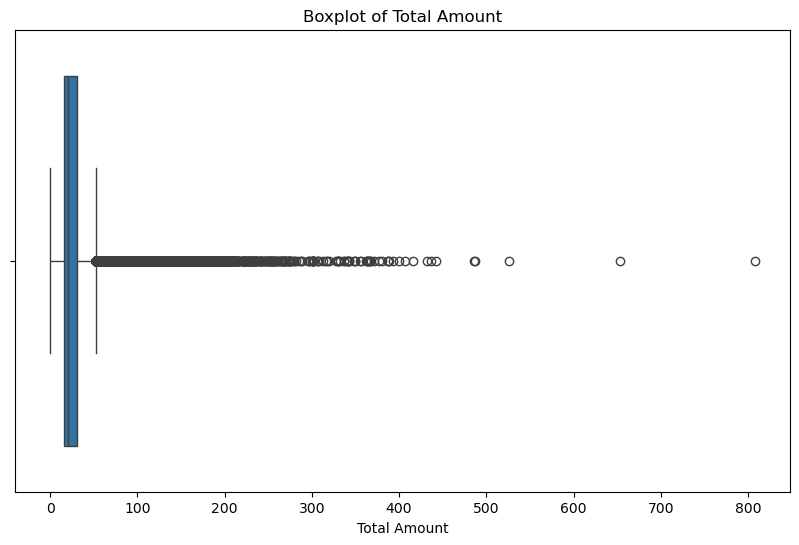

In [344]:
#Boxplot for total_amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot of Total Amount')
plt.xlabel('Total Amount')
plt.show()


In [345]:
#Remove outliers in total_amount
#Check the percentage of data with total_amount>99th percentile
df[df['total_amount']>df['total_amount'].quantile(0.99)].shape[0] / df.shape[0] * 100
#Capping the total_amount to 99th percentile
df.loc[df['total_amount']>df['total_amount'].quantile(0.99), 'total_amount'] = df['total_amount'].quantile(0.99)

In [346]:
df[df['mta_tax']>0.5].shape[0] / df.shape[0] * 100

#Drop the entries with mta_tax>0.5
df = df[df['mta_tax'] <= 0.5]

In [347]:
#Check the fare amount distribution
#Check the quantiles of fare amount
df['tip_amount'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.01     0.00
0.25     1.00
0.50     2.86
0.75     4.45
0.90     7.55
0.95    12.00
0.99    17.54
Name: tip_amount, dtype: float64

0.6303763261046971

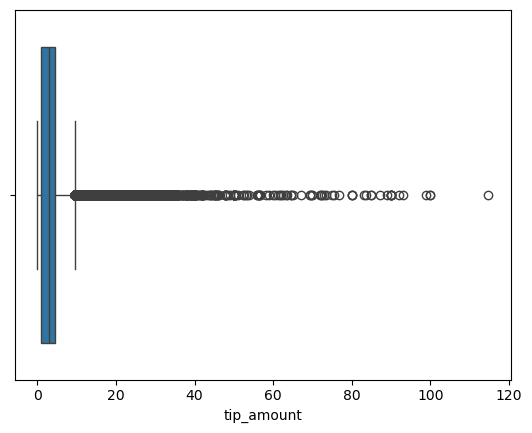

In [348]:
sns.boxplot(x='tip_amount', data=df)
#Check the percentage of data with tip amount>20(99.9 percentile)
df[df['tip_amount'] > 20].shape[0] / df.shape[0] * 100

In [349]:
#Since only 0.5% of the data is affected, we can drop these entries with values greater than 20
df = df[df['tip_amount'] <= 20]

df.describe()

passenger_count  trip_distance     RatecodeID   PULocationID  \
count    371389.000000  371389.000000  371389.000000  371389.000000   
mean          1.376015       3.354776       1.053968     165.668154   
std           0.871933       4.159650       0.307877      63.919149   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.100000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.360000       1.000000     234.000000   
max           6.000000      20.250000       5.000000     265.000000   

        DOLocationID  payment_type    fare_amount          extra  \
count  371389.000000  371389.00000  371389.000000  371389.000000   
mean      164.530928       1.19384      19.281170       1.583209   
std        69.555798       0.44922      16.785724       1.816056   
min         1.000000       1.00000       0.000000       0.000000   
25%       114.000000       1.00000       9.300000       0.000000   
50%       162.000000       1.00000      13.500000       1.000000   
75%       234.000000       1.00000      21.900000       2.500000   
max       265.000000       4.00000     800.000000      13.750000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  371389.000000  371389.000000  371389.000000          371389.000000   
mean        0.497360       3.427591       0.541857               0.999310   
std         0.036231       3.513986       2.002837               0.024489   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.400000       0.000000               1.000000   
max         0.500000      20.000000      76.550000               1.000000   

        total_amount  congestion_surcharge    airport_fee  
count  371389.000000         371389.000000  371389.000000  
mean       28.076027              2.343937       0.133863  
std        20.166510              0.604816       0.451109  
min         0.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.450000              2.500000       0.000000  
max       103.539000              2.500000       1.750000

In [350]:
df['tolls_amount'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

#Check the percentage of data with tolls amount>7(99.9 percentile)
df[df['tolls_amount']>7].shape[0] / df.shape[0] * 100

#Since only 0.3% of the data is affected, we can drop these entries
df = df[df['tolls_amount'] <= 7]

<Axes: xlabel='extra'>

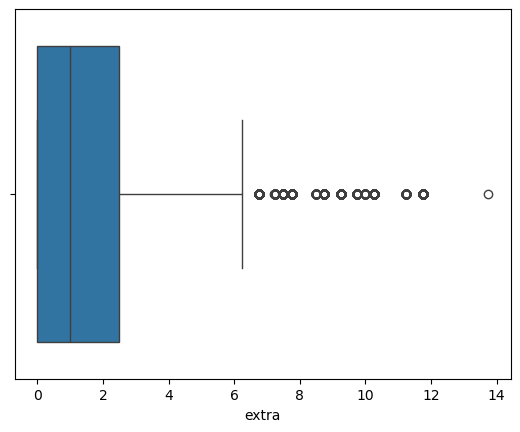

In [351]:
sns.boxplot(x='extra', data=df)

In [352]:
df['extra'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

#Check the percentage of data with extra>(99.9 percentile)
df[df['extra']>df['extra'].quantile(0.999)].shape[0] / df.shape[0] * 100

# #Since only 1%of data is affected, we can drop these entries
df = df[df['extra'] <= df['extra'].quantile(0.999)]

/opt/anaconda3/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<Axes: ylabel='fare_amount'>

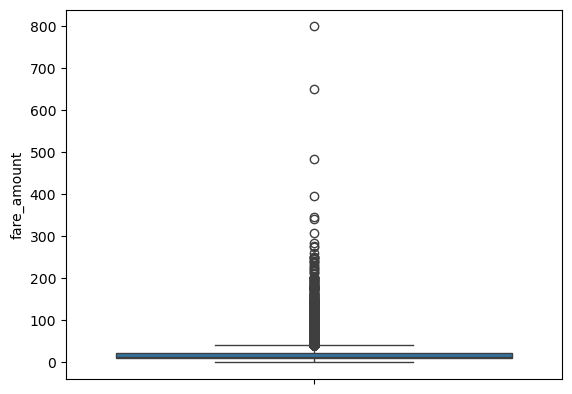

In [353]:
# Check for outliers in fare_amount
#Make a  horizontal boxplot to check for outliers

sns.boxplot(y=df['fare_amount'],orient='h')

In [354]:
df['fare_amount'].quantile(0.5), df['fare_amount'].quantile(0.75), df['fare_amount'].quantile(0.95), df['fare_amount'].quantile(0.99)

(13.5, 21.62, 59.7, 70.0)

In [355]:
#Remove outliers in fare_amount
df[df['fare_amount']>70].shape[0] / df.shape[0] * 100

0.7529863769802081

In [356]:
#Since this is 0.7% of data we can drop these rows
df = df[df['fare_amount'] <= 70]

In [357]:
#According to the data dictionary, the `airport_fee` column has a max of 1.25
#Check the percentage of data with airport_fee>1.25
df[df['airport_fee'] > 1.25].shape[0] / df.shape[0] * 100

5.726639259348113

In [358]:
df['airport_fee'].value_counts(normalize=True) * 100

airport_fee
0.00    92.355485
1.75     5.726639
1.25     1.917876
Name: proportion, dtype: float64

In [359]:
df['airport_fee'].mode()

0    0.0
Name: airport_fee, dtype: float64

In [360]:
# Since 6% of the data is affected, we can treat them as missing values
#Since only two types of airport fees are present, we can impute the missing values with mode

df['airport_fee']= df['airport_fee'].where(df['airport_fee'] <= 1.25, df['airport_fee'].mode()[0])


In [361]:
# Do any columns need standardising?
#Standardise date time columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [362]:
#Check trip_duration is nearly 0 and fare_amount is not 0
#Calculate trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes
#Check the percentage of data with trip_duration<0
df[df['trip_duration'] < 0].shape[0] / df.shape[0] * 100

0.001908334514683271

In [363]:
#Drop these entries since less than 0.1% of the data is affected
df = df[df['trip_duration'] >= 0]

In [364]:
#check if trip_duration is nearly 0 and fare_amount is not 0
df[(df['trip_duration'] ==0) & (df['fare_amount'] != 0)].shape[0] / df.shape[0] * 100

#Drop these entries since less than 0.1% of the data is affected
df = df[~((df['trip_duration'] ==0) & (df['fare_amount'] != 0))]


In [365]:
#Find percentage of data with trip_duration>99th percentile
df[df['trip_duration']>df['trip_duration'].quantile(0.99)].shape[0] / df.shape[0] * 100

#Drop these entries since less than 1% of the data is affected
df = df[df['trip_duration'] <= df['trip_duration'].quantile(0.99)]

In [366]:
df['tip_amount'].quantile([0.01,0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

0.01     0.00
0.25     1.00
0.50     2.82
0.75     4.30
0.90     6.82
0.95    10.21
0.99    16.11
Name: tip_amount, dtype: float64

In [367]:
#Find percentage of data with tip amount > 50th percentile but trip_duration is nearly 0
df[(df['tip_amount'] > df['tip_amount'].quantile(0.5)) & (df['trip_duration'] < 0.1)].shape[0] / df.shape[0] * 100

#Drop these entries since less than 0.1% of the data is affected
df = df[~((df['tip_amount'] > df['tip_amount'].quantile(0.5)) & (df['trip_duration'] < 0.1))]

In [368]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
VendorID                                                                        
2                  236             1          7.9    1.0      0.5        1.94   
2                  170             1         11.4    1.0      0.5        3.28   
2                  166             1         24.7    1.0      0.5        0.30   
2                   79             1         15.6    1.0      0.5        4.12   
2                  230             1          7.9    1.0      0.5        3.23   

          tolls_amount  improvement_surcharge  total_amount  \
VendorID                                                      
2                  0.0                    1.0         14.84   
2                  0.0                    1.0         19.68   
2                  0.0                    1.0         30.00   
2                  0.0                    1.0         24.72   
2                  0.0                    1.0         16.13   

          congestion_surcharge  airport_fee  trip_duration  
VendorID                                                    
2                          2.5          0.0       4.450000  
2                          2.5          0.0       9.350000  
2                          2.5          0.0      16.766667  
2                          2.5          0.0      15.166667  
2                          2.5          0.0       6.966667

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [369]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical

The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

These are all numerical values


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/341120713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['tpep_pickup_datetime'].dt.hour, data=df, palette='viridis')


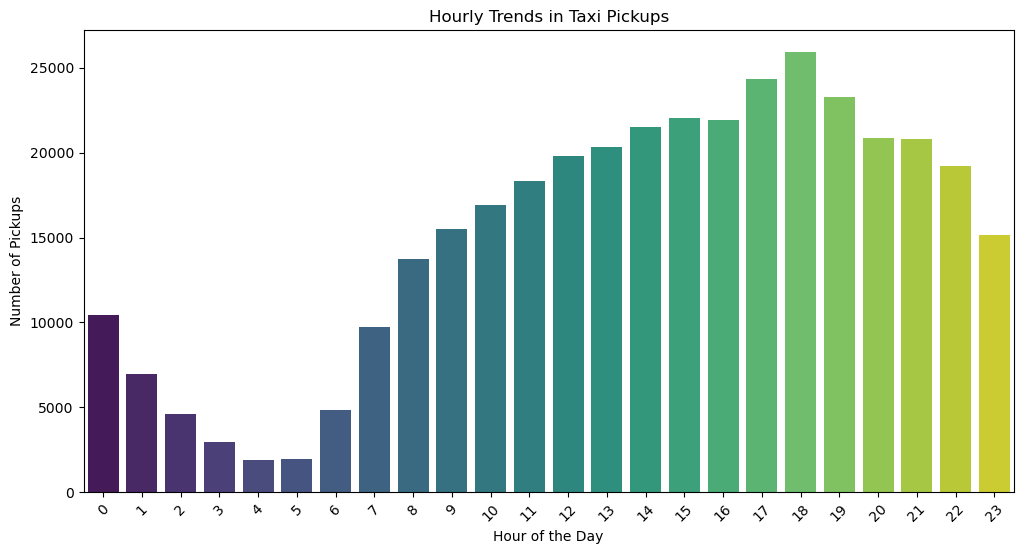

In [370]:
# Find and show the hourly trends in taxi pickups

# Plot the hourly trends
plt.figure(figsize=(12, 6))
sns.countplot(x=df['tpep_pickup_datetime'].dt.hour, data=df, palette='viridis')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/2075363609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['tpep_pickup_datetime'].dt.day_name(), data=df, palette='viridis')


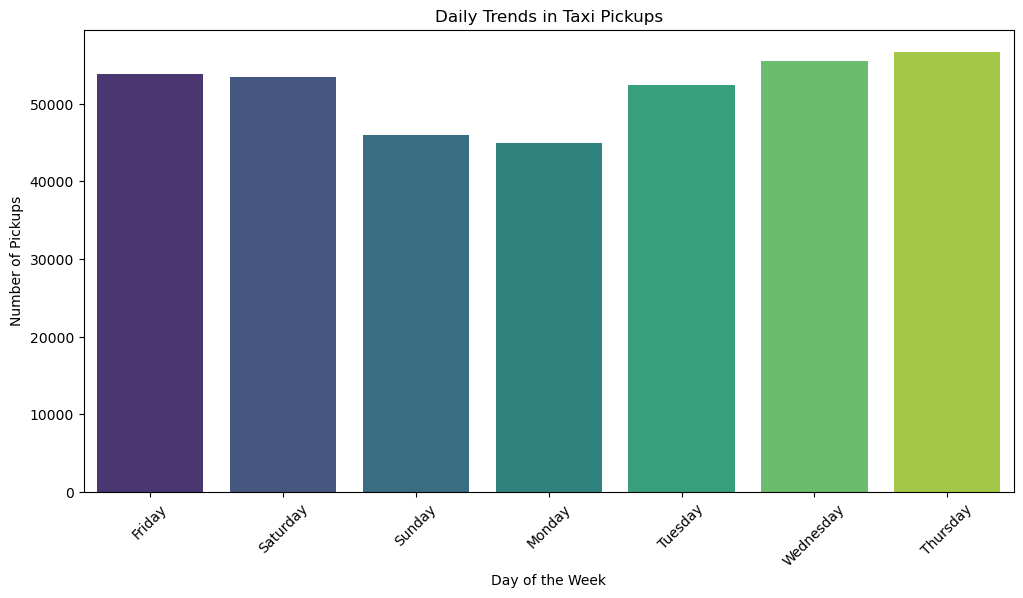

In [371]:
# Find and show the daily trends in taxi pickups (days of the week)

# Plot the daily trends
plt.figure(figsize=(12, 6))
sns.countplot(x=df['tpep_pickup_datetime'].dt.day_name(), data=df, palette='viridis')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1299473934.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['tpep_pickup_datetime'].dt.month_name(),


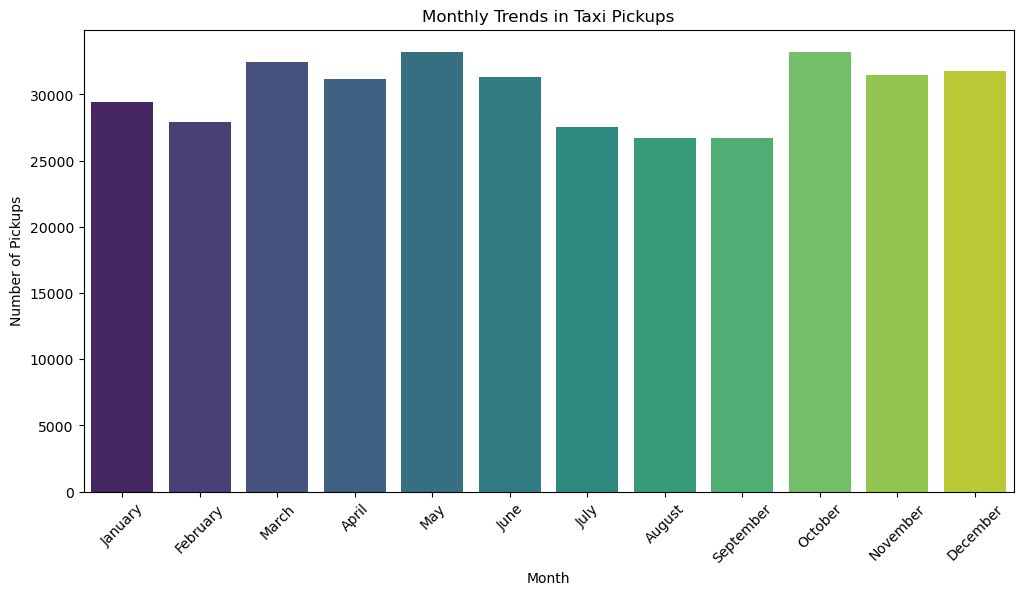

In [372]:
# Show the monthly trends in pickups
import calendar
# Get list of calendar month names in correct order
month_order = list(calendar.month_name)[1:]  # Skip empty string at index 0

# Plot with sorted months
plt.figure(figsize=(12, 6))
sns.countplot(x=df['tpep_pickup_datetime'].dt.month_name(), 
              data=df, 
              order=month_order, 
              palette='viridis')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [373]:
# Analyse the above parameters

#Check financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance` for zero/negative values
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()




fare_amount     tip_amount   total_amount  trip_distance
count  362980.000000  362980.000000  362980.000000  362980.000000
mean       18.021108       3.312656      26.696866       3.073368
std        14.012156       3.283374      17.978334       3.668431
min         0.000000       0.000000       0.000000       0.000000
25%         9.300000       1.000000      15.960000       1.080000
50%        13.500000       2.800000      20.800000       1.800000
75%        21.200000       4.300000      29.400000       3.200000
max        70.000000      20.000000     103.539000      20.250000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [374]:
# Create a df with non zero entries for the selected parameters.

df_non_zero = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]

In [375]:
df_non_zero[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  283057.000000  283057.000000  283057.000000  283057.000000
mean       17.925476       4.248007      27.619101       3.074373
std        13.799161       3.138650      18.357501       3.637714
min         0.120000       0.010000       4.510000       0.010000
25%         9.300000       2.380000      16.700000       1.100000
50%        13.500000       3.360000      21.480000       1.800000
75%        20.500000       4.960000      30.240000       3.200000
max        70.000000      20.000000     103.539000      20.250000

In [376]:
df_non_zero.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
VendorID                                                                        
2                  236             1          7.9    1.0      0.5        1.94   
2                  170             1         11.4    1.0      0.5        3.28   
2                  166             1         24.7    1.0      0.5        0.30   
2                   79             1         15.6    1.0      0.5        4.12   
2                  230             1          7.9    1.0      0.5        3.23   

          tolls_amount  improvement_surcharge  total_amount  \
VendorID                                                      
2                  0.0                    1.0         14.84   
2                  0.0                    1.0         19.68   
2                  0.0                    1.0         30.00   
2                  0.0                    1.0         24.72   
2                  0.0                    1.0         16.13   

          congestion_surcharge  airport_fee  trip_duration  
VendorID                                                    
2                          2.5          0.0       4.450000  
2                          2.5          0.0       9.350000  
2                          2.5          0.0      16.766667  
2                          2.5          0.0      15.166667  
2                          2.5          0.0       6.966667

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/2380441686.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total Revenue', data=monthly_revenue_df, palette='viridis', order=month_order)


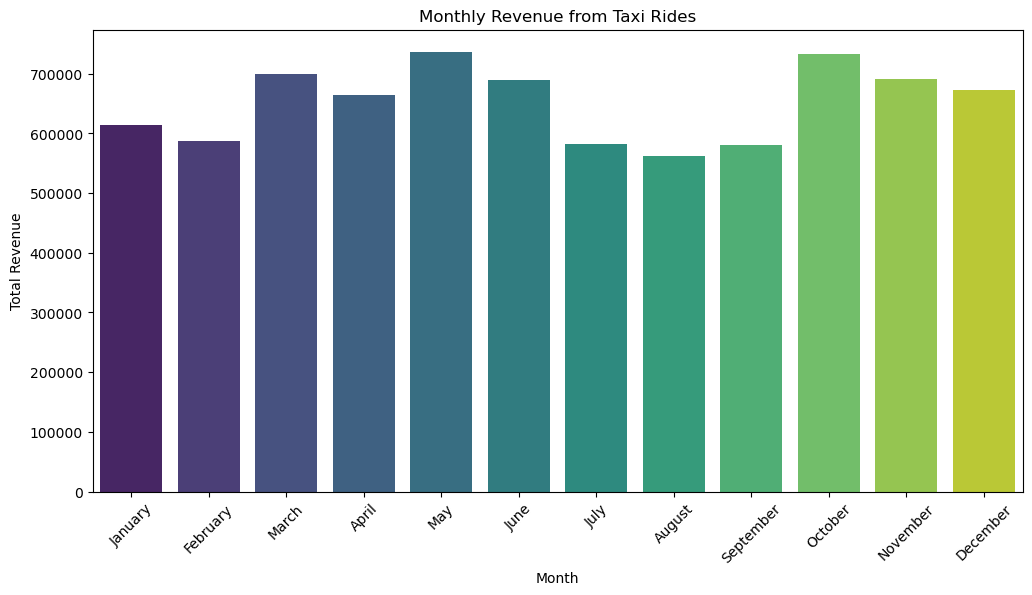

In [377]:
# Group data by month and analyse monthly revenue

# Group data by month and analyse total_amount
monthly_revenue = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.month_name())['total_amount'].sum()

# Convert the Series to a DataFrame for plotting
monthly_revenue_df = monthly_revenue.reset_index()
monthly_revenue_df.columns = ['Month', 'Total Revenue']

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Revenue', data=monthly_revenue_df, palette='viridis', order=month_order)
plt.title('Monthly Revenue from Taxi Rides')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [378]:
df_non_zero.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
VendorID                                                                        
2                  236             1          7.9    1.0      0.5        1.94   
2                  170             1         11.4    1.0      0.5        3.28   
2                  166             1         24.7    1.0      0.5        0.30   
2                   79             1         15.6    1.0      0.5        4.12   
2                  230             1          7.9    1.0      0.5        3.23   

          tolls_amount  improvement_surcharge  total_amount  \
VendorID                                                      
2                  0.0                    1.0         14.84   
2                  0.0                    1.0         19.68   
2                  0.0                    1.0         30.00   
2                  0.0                    1.0         24.72   
2                  0.0                    1.0         16.13   

          congestion_surcharge  airport_fee  trip_duration  
VendorID                                                    
2                          2.5          0.0       4.450000  
2                          2.5          0.0       9.350000  
2                          2.5          0.0      16.766667  
2                          2.5          0.0      15.166667  
2                          2.5          0.0       6.966667

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

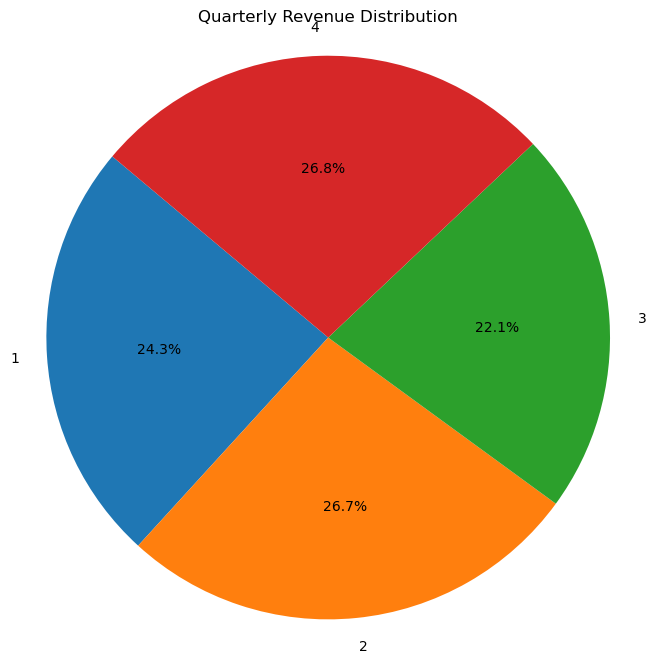

In [379]:
# Calculate proportion of each quarter

quarterly_data= df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.quarter)['total_amount'].sum().reset_index()

#Plot a pie chart for quarterly data

plt.figure(figsize=(8, 8))
plt.pie(quarterly_data['total_amount'], labels=quarterly_data['tpep_pickup_datetime'], autopct='%1.1f%%', startangle=140)
plt.title('Quarterly Revenue Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

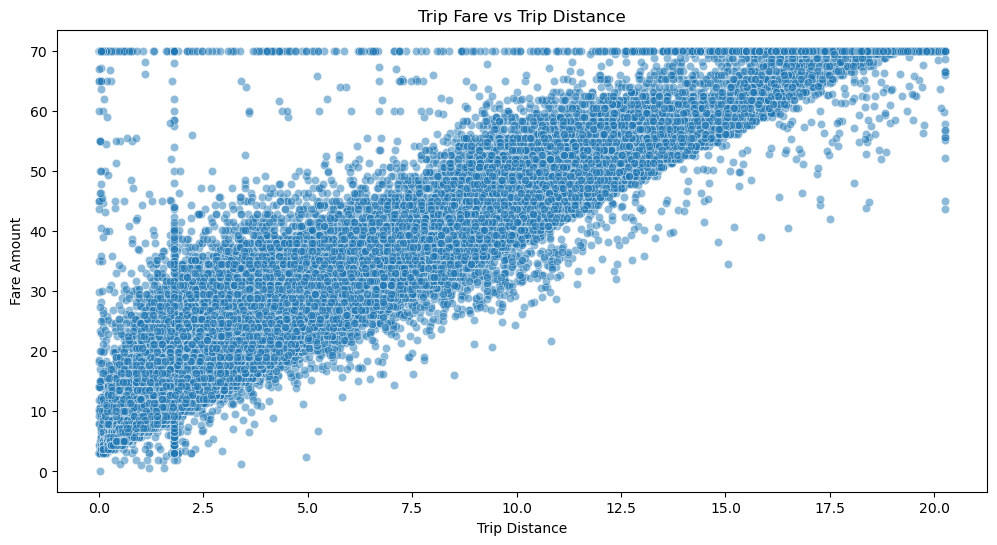

In [380]:
# Show how trip fare is affected by distance

#Plot a scatterplot for fare amount vs trip distance

plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_non_zero, alpha=0.5)
plt.title('Trip Fare vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

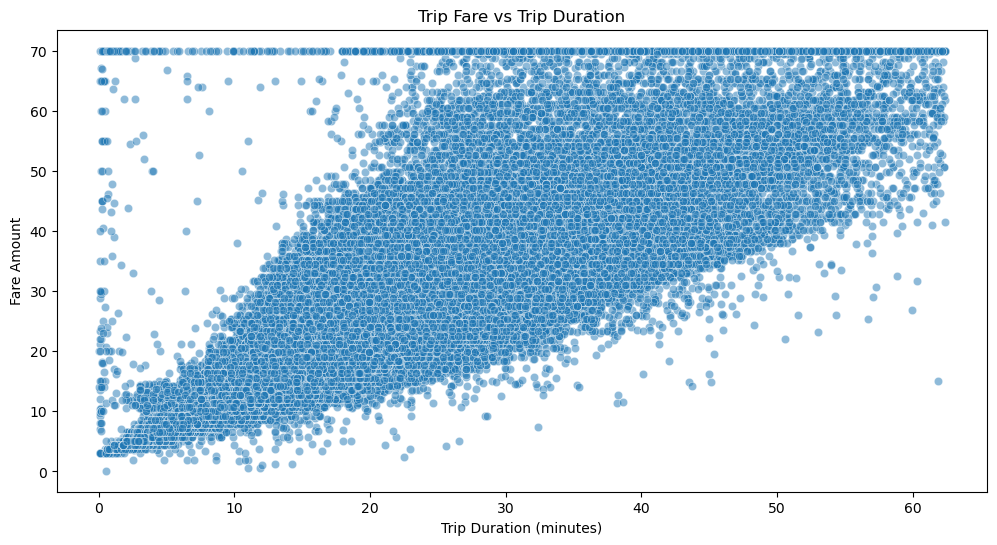

In [381]:
# Show relationship between fare and trip duration

# Plot a scatterplot for fare amount vs trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_non_zero, alpha=0.5)
plt.title('Trip Fare vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/4104870395.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='fare_amount', data=df, palette='viridis')


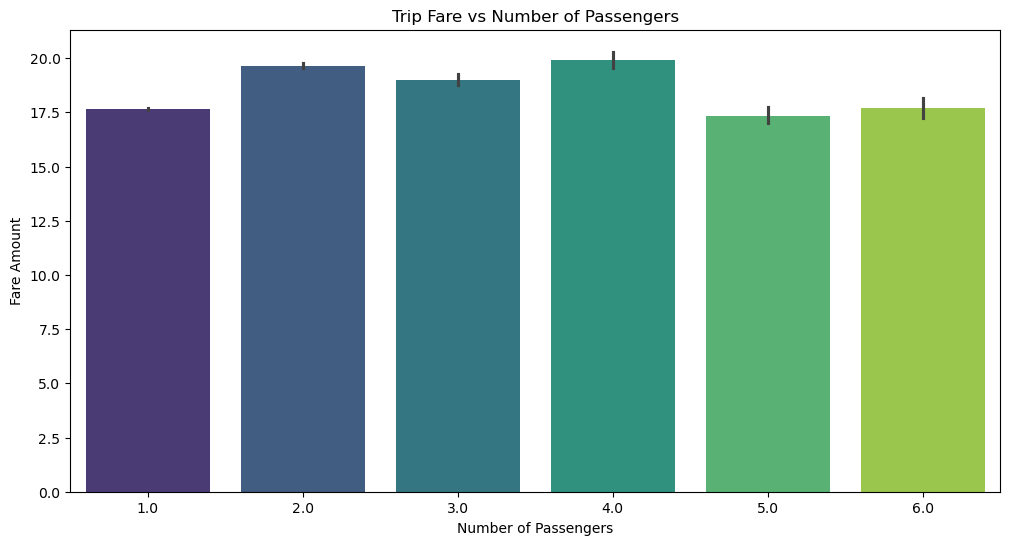

In [382]:
# Show relationship between fare and number of passengers

df['passenger_count'].value_counts(normalize=True)
#Plot a barplot for fare amount vs passenger count
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='fare_amount', data=df, palette='viridis')
plt.title('Trip Fare vs Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.show()

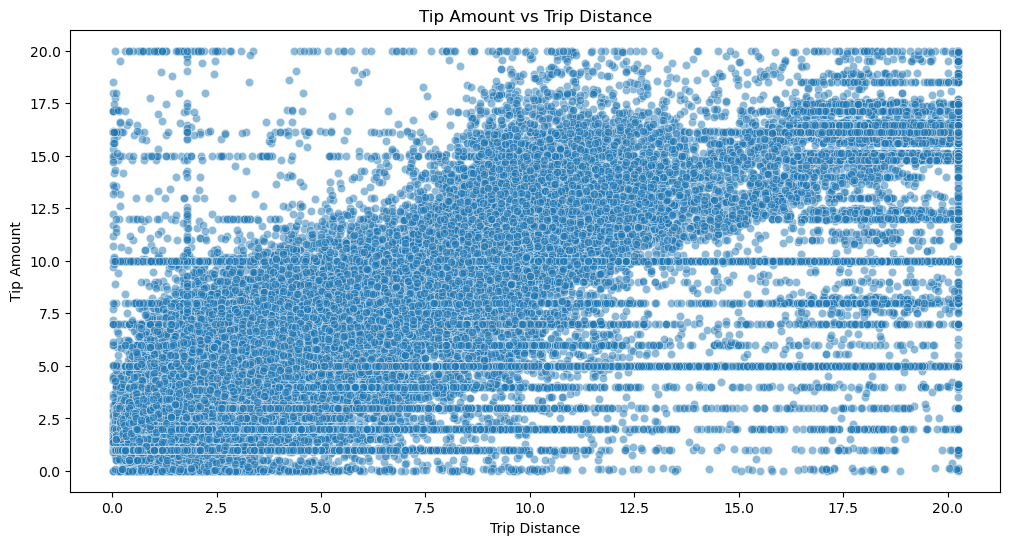

In [383]:
# Show relationship between tip and trip distance

#Plot a scatterplot for tip amount vs trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_non_zero, alpha=0.5)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1757044272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, palette='viridis')


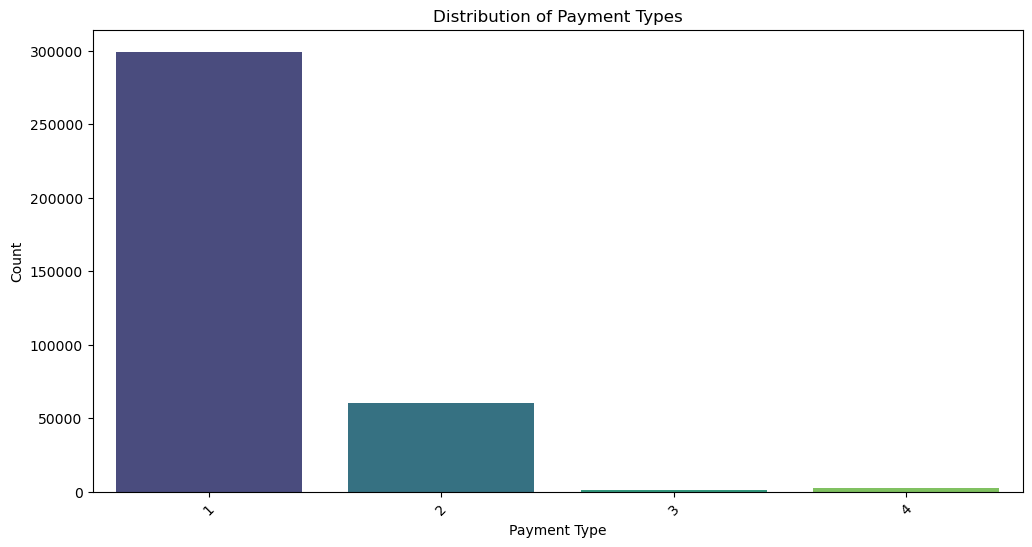

In [384]:
# Analyse the distribution of different payment types (payment_type).

df['payment_type'].value_counts(normalize=True)

#Plot a barplot for payment type
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', data=df, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [157]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [392]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/prajakta.p/Documents/Upgrad/Datasets/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

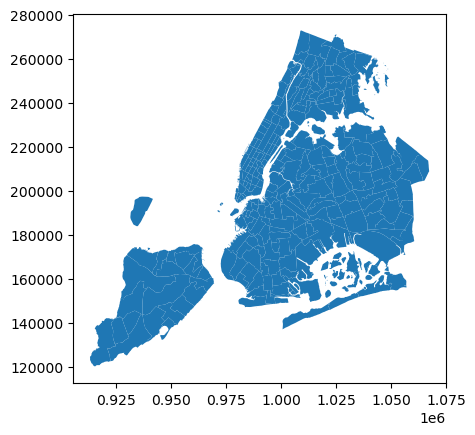

In [286]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [398]:
# Merge zones and trip records using locationID and PULocationID
df.reset_index(inplace=True)
df= df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
df.set_index('VendorID', inplace=True)

df.head()


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  ...  congestion_surcharge  \
VendorID                                           ...                         
2                  236             1          7.9  ...                   2.5   
2                  170             1         11.4  ...                   2.5   
2                  166             1         24.7  ...                   2.5   
2                   79             1         15.6  ...                   2.5   
2                  230             1          7.9  ...                   2.5   

          airport_fee  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
VendorID                                                                 
2                 0.0       4.450000     238.0    0.060109    0.000185   
2                 0.0       9.350000      79.0    0.042625    0.000108   
2                 0.0      16.766667     163.0    0.034177    0.000041   
2                 0.0      15.166667      87.0    0.036902    0.000067   
2                 0.0       6.966667     100.0    0.024813    0.000037   

                              zone  LocationID    borough  \
VendorID                                                    
2            Upper West Side North       238.0  Manhattan   
2                     East Village        79.0  Manhattan   
2                    Midtown North       163.0  Manhattan   
2         Financial District North        87.0  Manhattan   
2                 Garment District       100.0  Manhattan   

                                                   geometry  
VendorID                                                     
2         POLYGON ((992877.88 225627.534, 992741.735 225...  
2         POLYGON ((988746.067 202151.955, 988733.885 20...  
2         POLYGON ((989412.663 219020.943, 990045.841 21...  
2         POLYGON ((983217.971 196831.021, 983250.399 19...  
2         POLYGON ((987770.527 212686.678, 987638.873 21...  

[5 rows x 26 columns]

In [396]:
df.drop(columns=['OBJECTID_x',
       'Shape_Leng_x', 'Shape_Area_x', 'zone_x', 'LocationID_x', 'borough_x',
       'geometry_x', 'trip_count', 'OBJECTID_y', 'Shape_Leng_y',
       'Shape_Area_y', 'zone_y', 'LocationID_y', 'borough_y', 'geometry_y'], inplace=True)

In [397]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [399]:
# Group data by location and calculate the number of trips

#Grouping data by LocationID
df_grouped = df.groupby('LocationID').size().reset_index(name='trip_count')

print(df_grouped.head())

   LocationID  trip_count
0         1.0           3
1         2.0           1
2         3.0           1
3         4.0         458
4         6.0           1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(df_grouped, left_on='LocationID', right_on='LocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)  # Fill NaN values with 0

zones.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0         3.0  
1         1.0  
2         1.0  
3       458.0  
4         0.0

In [401]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

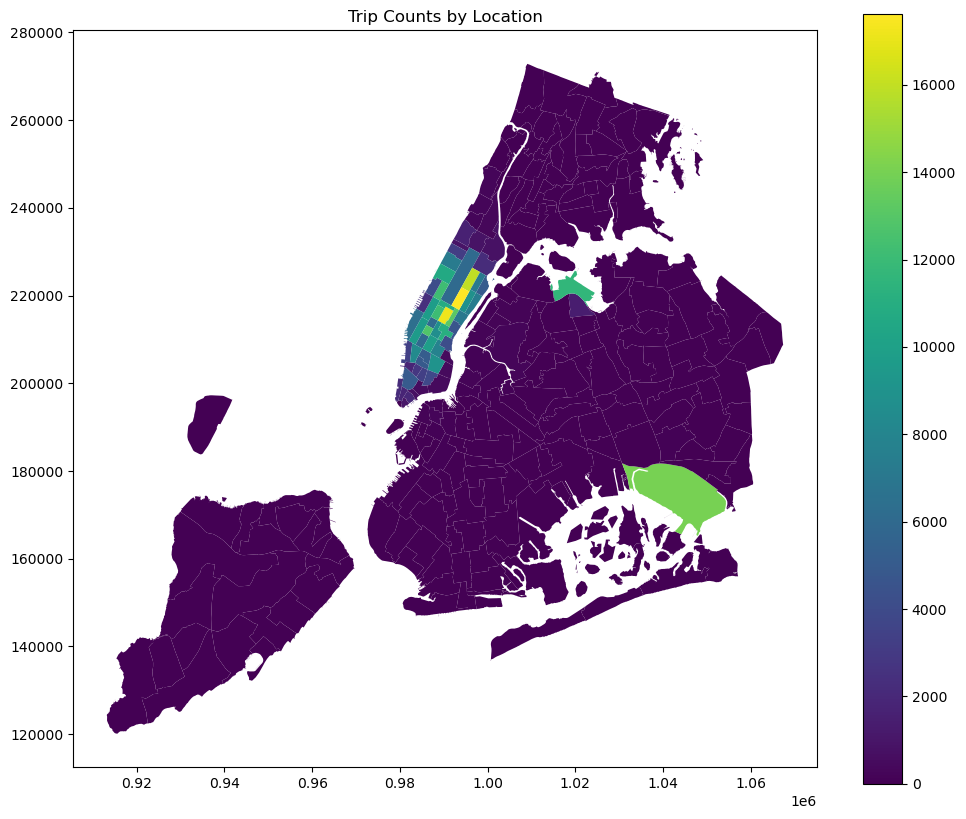

In [404]:
# Define figure and axis
fig,ax=plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(ax=ax, column='trip_count', legend=True)

plt.title('Trip Counts by Location')
plt.show()


In [405]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='trip_count', ascending=False).head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
131       132    0.245479    0.002038                   JFK Airport   
161       162    0.035270    0.000048                  Midtown East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
141       142    0.038176    0.000076           Lincoln Square East   
229       230    0.031028    0.000056     Times Sq/Theatre District   
137       138    0.107467    0.000537             LaGuardia Airport   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     trip_count  
236     17628.0  
160     17211.0  
235     15914.0  
131     14030.0  
161     13100.0  
185     12791.0  
141     12184.0  
229     12081.0  
137     11626.0  
169     11026.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [406]:
# Find routes which have the slowest speeds at different times of the day

# Group by hour of day, pickup zone, and drop-off zone
route_data = df_non_zero.groupby([
    df_non_zero['tpep_pickup_datetime'].dt.hour.rename('pickup_hour'),
    'PULocationID',
    'DOLocationID'
]).agg({
    'trip_duration': 'mean',
    'trip_distance': 'mean'
}).reset_index('pickup_hour')

# Calculate average speed (in miles per hour)
route_data['average_speed'] = route_data['trip_distance'] / (route_data['trip_duration'] / 60)

# Sort by slowest routes (lowest speed)
slowest_routes = route_data.sort_values(by='average_speed', ascending=True)

#print the slowest routes
slowest_routes.head(10)



pickup_hour  trip_duration  trip_distance  \
PULocationID DOLocationID                                              
243          68                     15      38.816667           0.04   
74           74                     11       3.383333           0.01   
249          138                    10      59.000000           0.22   
193          193                    10       2.450000           0.02   
144          211                    17      11.066667           0.18   
100          100                    10       7.633333           0.15   
211          125                    13       6.050000           0.12   
151          211                    19      27.450000           0.56   
224          231                    15      17.150000           0.38   
158          158                    16      13.516667           0.30   

                           average_speed  
PULocationID DOLocationID                 
243          68                 0.061829  
74           74                 0.177340  
249          138                0.223729  
193          193                0.489796  
144          211                0.975904  
100          100                1.179039  
211          125                1.190083  
151          211                1.224044  
224          231                1.329446  
158          158                1.331689

In [169]:
df_non_zero.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration'],
      dtype='object')

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/2158928113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tpep_pickup_datetime', y='trip_count', data=hourly_data, palette='viridis')


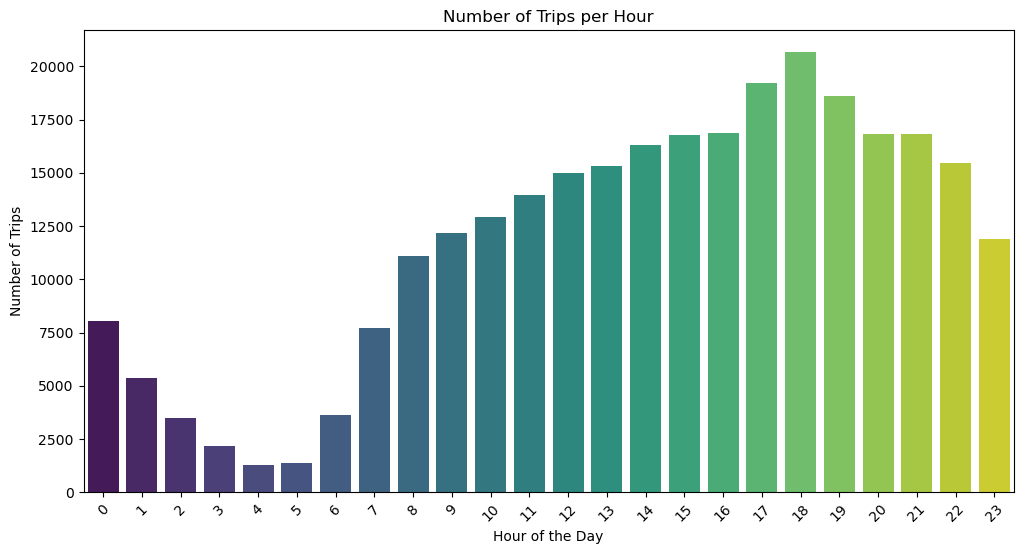

In [175]:
# Visualise the number of trips per hour and find the busiest hour

# Group data by hour of day
hourly_data = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour).size()

# Reset index to get a DataFrame
hourly_data = hourly_data.reset_index(name='trip_count')
# Plot the hourly data
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='trip_count', data=hourly_data, palette='viridis')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [407]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Define sampling fraction
sample_fraction = 0.01

# Group by pickup hour and count trips
hourly_trip_counts = df_non_zero.groupby(df_non_zero['tpep_pickup_datetime'].dt.hour).size().reset_index(name='sampled_trip_count')

# Scale up the trip counts to estimate actual trip counts
hourly_trip_counts['estimated_total_trips'] = (hourly_trip_counts['sampled_trip_count'] / sample_fraction).round().astype(int)

# Sort by estimated trip count and get top 5 busiest hours
top_5_busiest_hours = hourly_trip_counts.sort_values(by='estimated_total_trips', ascending=False).head(5)

top_5_busiest_hours.head(5)



tpep_pickup_datetime  sampled_trip_count  estimated_total_trips
18                    18               20645                2064500
17                    17               19180                1918000
19                    19               18623                1862300
20                    20               16906                1690600
21                    21               16864                1686400

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

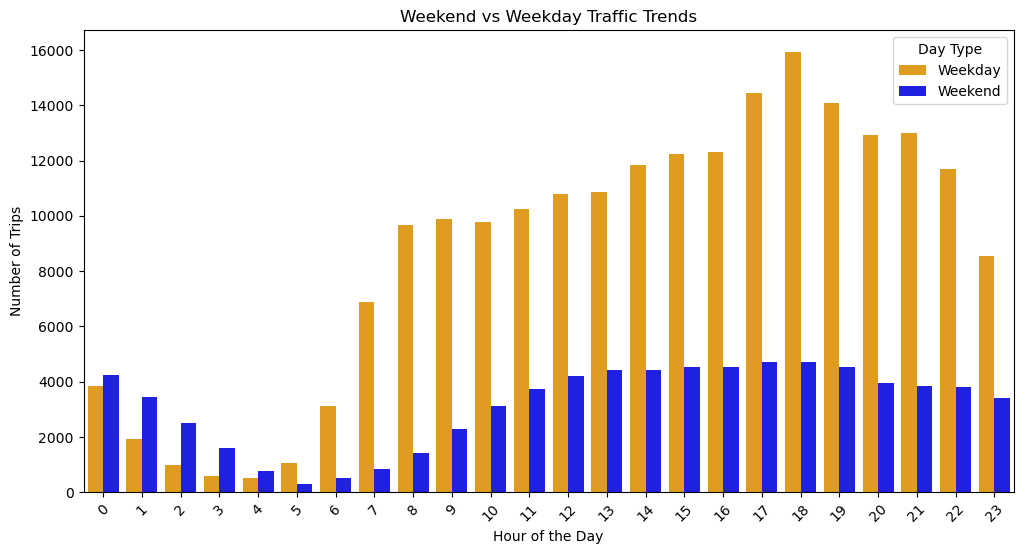

In [408]:
# Compare traffic trends for the weekdays and weekends

# Add a new column to classify trips as weekday or weekend
df_non_zero['day_type'] = df_non_zero['tpep_pickup_datetime'].dt.day_name().apply(
	lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Group data by day type and hour
traffic_data = df_non_zero.groupby(['day_type', df_non_zero['tpep_pickup_datetime'].dt.hour]).size().reset_index(name='trip_count')

# Plot weekend vs weekday data
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='trip_count', hue='day_type', data=traffic_data, palette={'Weekend': 'blue', 'Weekday': 'orange'})
plt.title('Weekend vs Weekday Traffic Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [321]:
df_non_zero.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration', 'day_type'],
      dtype='object')

In [409]:
pickup_hourly

PULocationID  tpep_pickup_datetime  pickup_count
0                1                    14             1
1                2                    10             1
2                4                     0            34
3                4                     1            58
4                4                     2            42
...            ...                   ...           ...
2322           265                    13             1
2323           265                    14             1
2324           265                    15             1
2325           265                    16             2
2326           265                    17             1

[2327 rows x 3 columns]

Top 10 Pickup Zones:
     PULocationID  pickup_count
164           237         14167
108           161         13580
163           236         13001
109           162         10495
122           186          9743
92            142          9741
88            138          9483
82            132          9256
166           239          8793
157           230          8777

Top 10 Dropoff Zones:
     DOLocationID  dropoff_count
216           236          13972
217           237          12951
147           161          11152
156           170           8671
219           239           8644
129           142           8401
148           162           8397
128           141           7976
210           230           7715
64             68           7348


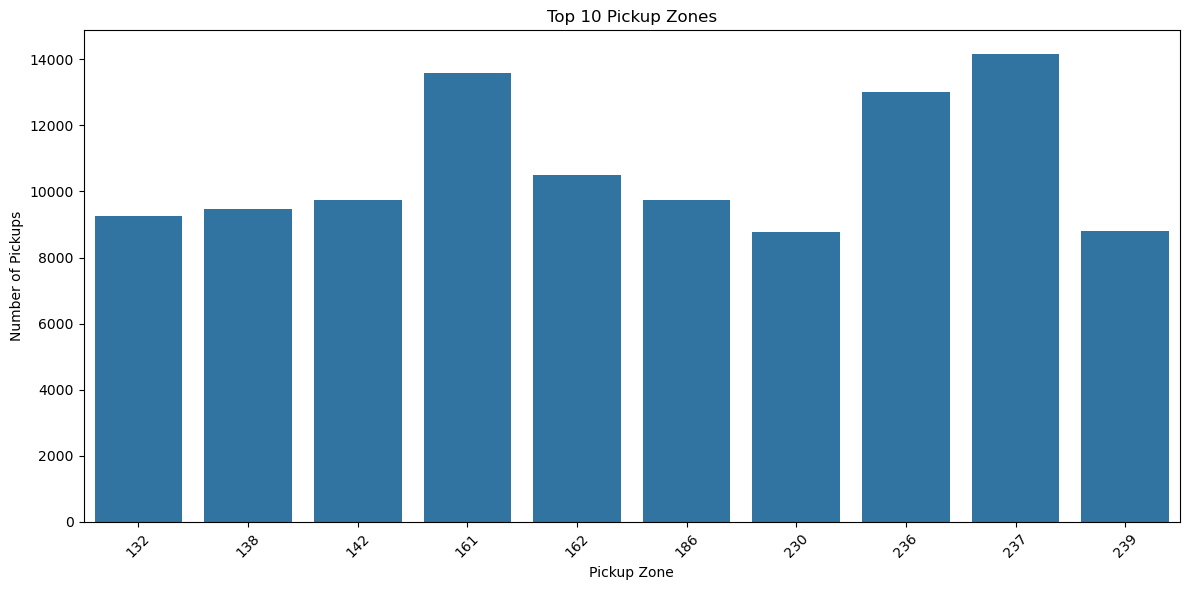

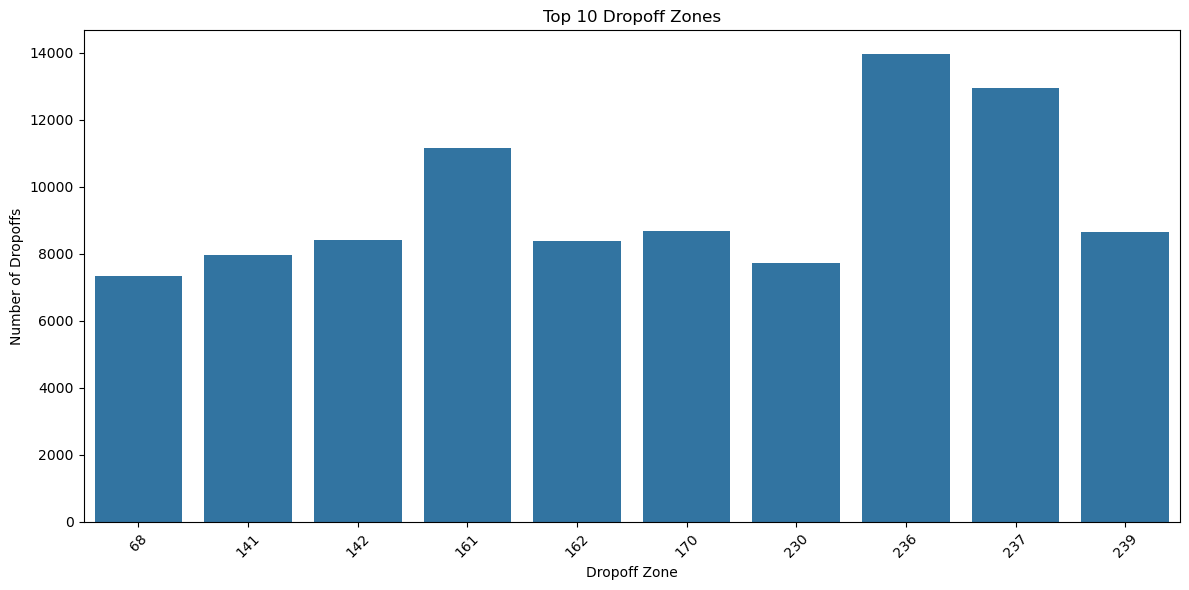

In [410]:
# Find top 10 pickup and dropoff zones

# Group data by pickup and dropoff zones
# Group data by pickup and hour
pickup_hourly = df_non_zero.groupby(['PULocationID', df_non_zero['tpep_pickup_datetime'].dt.hour]).size().reset_index(name='pickup_count')
dropoff_hourly = df_non_zero.groupby(['DOLocationID', df_non_zero['tpep_dropoff_datetime'].dt.hour]).size().reset_index(name='dropoff_count')

# Sort by pickup and dropoff counts
top_pickup_zones = pickup_hourly.groupby('PULocationID')['pickup_count'].sum().reset_index()
top_dropoff_zones = dropoff_hourly.groupby('DOLocationID')['dropoff_count'].sum().reset_index()

# Find the top 10 pickup and dropoff zones
top_pickup_zones = top_pickup_zones.nlargest(10, 'pickup_count')
top_dropoff_zones = top_dropoff_zones.nlargest(10, 'dropoff_count')

# Display the top 10 pickup and dropoff zones
print("Top 10 Pickup Zones:")
print(top_pickup_zones)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)

#Visualise the top 10 pickup and dropoff zones
# Plot the top 10 pickup zones
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pickup_zones, x='PULocationID', y='pickup_count')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the top 10 dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(data=top_dropoff_zones, x='DOLocationID', y='dropoff_count')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Dropoff Zone')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [411]:
# Count pickups and dropoffs by zone
pickup_counts = df_non_zero['PULocationID'].value_counts()
dropoff_counts = df_non_zero['DOLocationID'].value_counts()

# Combine into a DataFrame using outer join to include all unique zone trip counts
pickup_dropoff = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)

# Calculate pickup/dropoff ratio, avoid divide-by-zero
pickup_dropoff['ratio'] = pickup_dropoff['pickup_count'] / pickup_dropoff['dropoff_count'].replace(0, float('nan'))

# Sort and get top and bottom 10
top_10 = pickup_dropoff.sort_values(by='ratio', ascending=False).head(10)
bottom_10 = pickup_dropoff.sort_values(by='ratio', ascending=True).head(10)




In [186]:
top_10.head(10)

pickup_count  dropoff_count      ratio
70         1114.0           89.0  12.516854
132        9366.0         2015.0   4.648139
138        9247.0         3803.0   2.431501
186        9745.0         5905.0   1.650296
114        4028.0         2828.0   1.424328
43         4707.0         3445.0   1.366328
249        6927.0         5281.0   1.311683
162       10497.0         8384.0   1.252028
161       13582.0        11147.0   1.218444
100        4282.0         3541.0   1.209263

In [187]:
bottom_10.head(10)

pickup_count  dropoff_count  ratio
131           0.0           36.0    0.0
222           0.0            6.0    0.0
221           0.0            3.0    0.0
167           0.0           10.0    0.0
184           0.0            1.0    0.0
46            0.0            4.0    0.0
47            0.0            2.0    0.0
212           0.0            8.0    0.0
172           0.0            1.0    0.0
51            0.0            9.0    0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Pickup Zones During Night Hours:
     PULocationID  pickup_count
33             79          2709
111           249          2159
56            132          1648
67            148          1582
19             48          1555
49            114          1471
99            230          1188
82            186          1044
59            138           956
75            164           949

Top 10 Dropoff Zones During Night Hours:
     DOLocationID  dropoff_count
63             79           1444
35             48           1093
85            107           1067
139           170           1062
112           141           1049
218           263            977
53             68            966
206           249            892
194           236            871
197           239            851


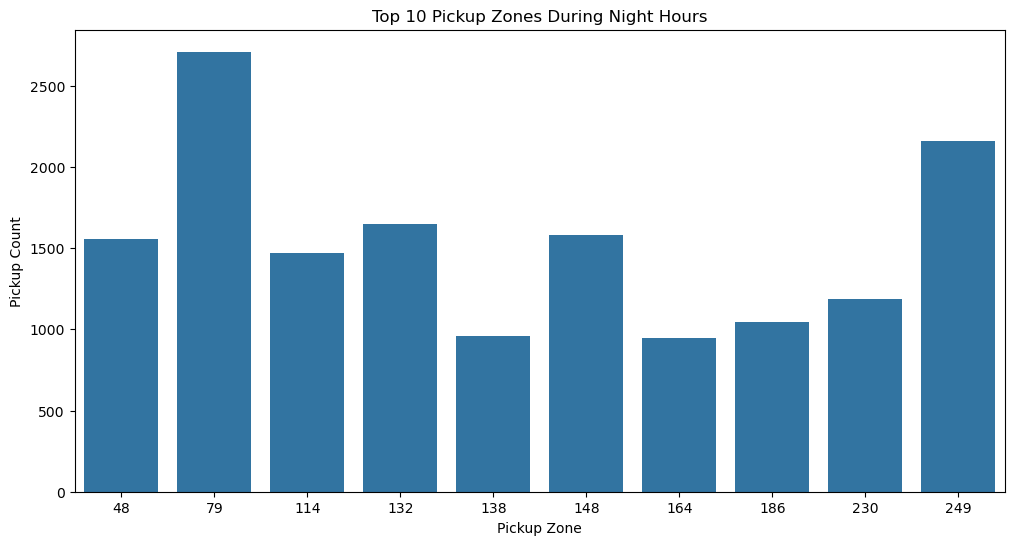

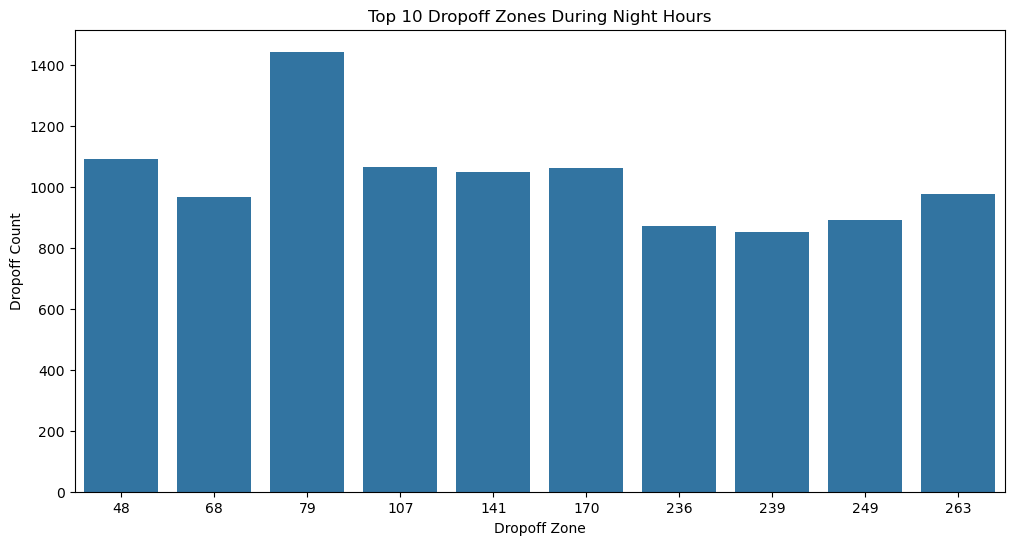

In [412]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11pm to 5am) for pickup and dropoff
night_hours_pickup = df_non_zero[(df_non_zero['tpep_pickup_datetime'].dt.hour == 23) | (df_non_zero['tpep_pickup_datetime'].dt.hour <=5)]
night_hours_dropoff = df_non_zero[(df_non_zero['tpep_dropoff_datetime'].dt.hour == 23) | (df_non_zero['tpep_dropoff_datetime'].dt.hour <= 5)]

# Group data by pickup and dropoff zones
pickup_night = night_hours_pickup.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night = night_hours_dropoff.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Sort by pickup and dropoff counts
top_10_pickup = pickup_night.sort_values(by='pickup_count', ascending=False).head(10)
top_10_dropoff = dropoff_night.sort_values(by='dropoff_count', ascending=False).head(10)

# Display the top 10 pickup and dropoff zones during night hours

print("Top 10 Pickup Zones During Night Hours:")
print(top_10_pickup)

print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_10_dropoff)

# Visualise the top 10 pickup and dropoff zones during night hours
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_pickup, x='PULocationID', y='pickup_count')
plt.title('Top 10 Pickup Zones During Night Hours')
plt.xlabel('Pickup Zone')
plt.ylabel('Pickup Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_dropoff, x='DOLocationID', y='dropoff_count')
plt.title('Top 10 Dropoff Zones During Night Hours')
plt.xlabel('Dropoff Zone')
plt.ylabel('Dropoff Count')
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

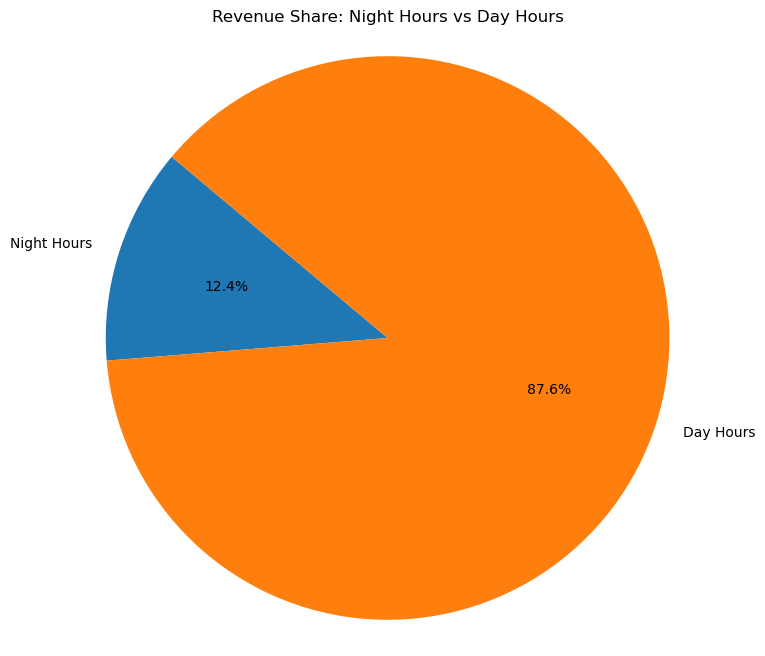

In [413]:
# Filter for night hours (11 PM to 5 AM)

#Find total_revenue for night hours
#Filter data for night hours (11 PM to 5 AM)
night_hours_revenue = df_non_zero[(df_non_zero['tpep_pickup_datetime'].dt.hour == 23) | (df_non_zero['tpep_pickup_datetime'].dt.hour <= 5)]

#Find revenue share for night hours
night_hours_revenue_share = night_hours_revenue['total_amount'].sum() / df_non_zero['total_amount'].sum() * 100

day_hours_revenue_share = 100 - night_hours_revenue_share

#Visualise the revenue share
plt.figure(figsize=(8, 8))
plt.pie([night_hours_revenue_share, day_hours_revenue_share], labels=['Night Hours', 'Day Hours'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share: Night Hours vs Day Hours')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()





##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [414]:
# Analyse the fare per mile per passenger for different passenger counts

#Group by different passenger counts
fare_per_mile = df_non_zero.groupby('passenger_count').agg({
    'fare_amount': 'mean',
    'trip_distance': 'mean'
}).reset_index()

# Calculate fare per mile
fare_per_mile['fare_per_mile'] = fare_per_mile['fare_amount'] / fare_per_mile['trip_distance']

#Display the fare per mile for different passenger counts
fare_per_mile.head(10)



passenger_count  fare_amount  trip_distance  fare_per_mile
0              1.0    17.594558       2.992749       5.879063
1              2.0    19.443360       3.462358       5.615641
2              3.0    18.638073       3.224482       5.780175
3              4.0    19.527828       3.380376       5.776821
4              5.0    17.568740       3.006149       5.844268
5              6.0    17.500975       2.996141       5.841171

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

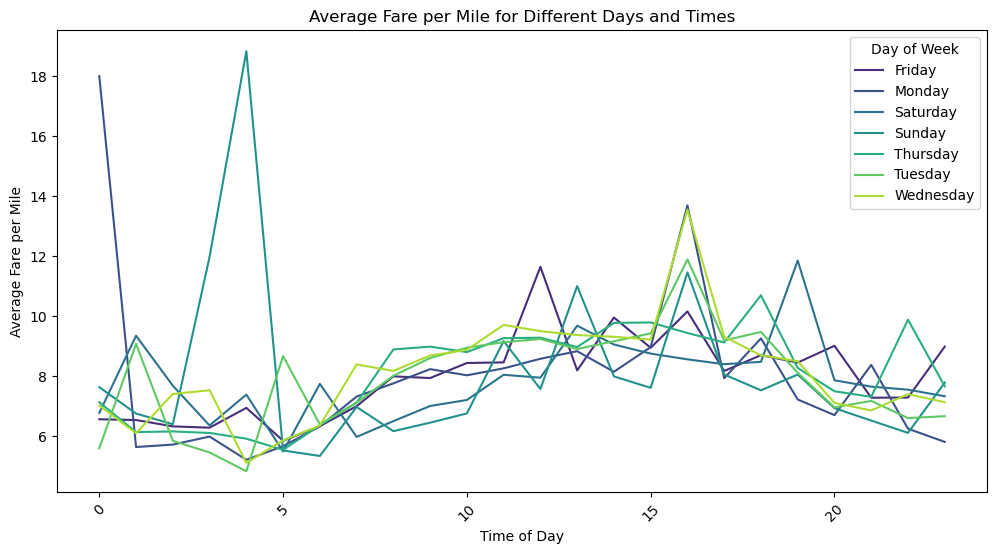

In [416]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df_non_zero['fare_per_mile'] = df_non_zero['fare_amount'] / df_non_zero['trip_distance']

# Group by day of week and time of day
df_non_zero['day_of_week'] = df_non_zero['tpep_pickup_datetime'].dt.day_name()
df_non_zero['time_of_day'] = df_non_zero['tpep_pickup_datetime'].dt.hour

# Calculate average fare per mile for different days and times
average_fare_per_mile = df_non_zero.groupby(['day_of_week', 'time_of_day'])['fare_per_mile'].mean().reset_index()

# Display the average fare per mile for different days and times
average_fare_per_mile.head(10)

# Plot the average fare per mile for different days and times
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_of_day', y='fare_per_mile', hue='day_of_week', data=average_fare_per_mile, palette='viridis')
plt.title('Average Fare per Mile for Different Days and Times')
plt.xlabel('Time of Day')
plt.ylabel('Average Fare per Mile')
plt.legend(title='Day of Week')
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

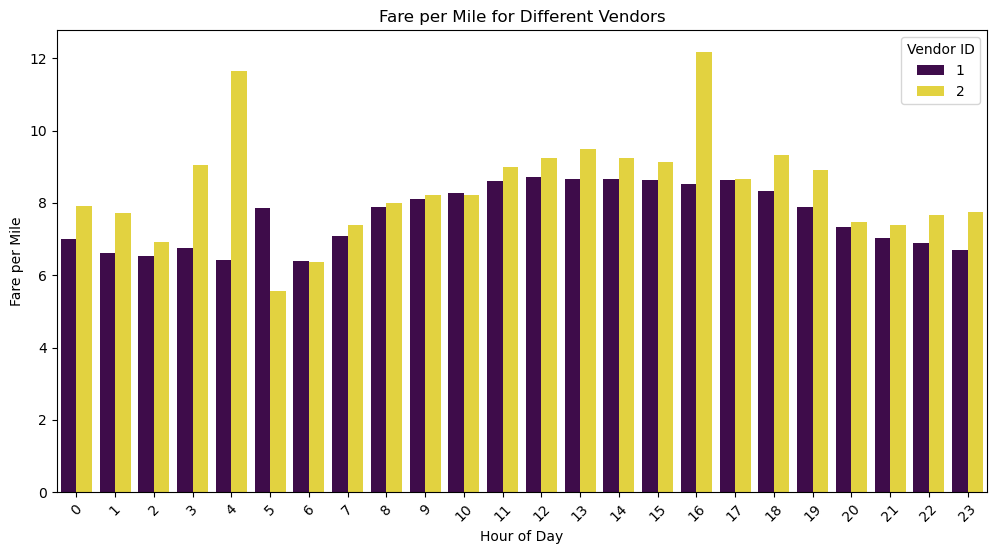

In [421]:
# Compare fare per mile for different vendors

#Vendor is already set as index
# Calculate fare per mile for different vendors for different hours of the day

# Group by vendor and hour of day
vendor_fare_per_mile = df_non_zero.groupby(['VendorID', df_non_zero['tpep_pickup_datetime'].dt.hour])['fare_per_mile'].mean().reset_index()
# Display the fare per mile for different vendors
vendor_fare_per_mile.head(10)
# Plot the fare per mile for different vendors
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='fare_per_mile', hue='VendorID', data=vendor_fare_per_mile, palette='viridis')
plt.title('Fare per Mile for Different Vendors')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile')
plt.legend(title='Vendor ID')
plt.xticks(rotation=45)
plt.show()


In [418]:
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
2         2023-12-01 00:31:10   2023-12-01 00:35:37              1.0   
2         2023-12-01 00:00:40   2023-12-01 00:10:01              3.0   
2         2023-12-01 00:15:23   2023-12-01 00:32:09              5.0   
2         2023-12-01 00:41:11   2023-12-01 00:56:21              1.0   
2         2023-12-01 00:22:23   2023-12-01 00:29:21              2.0   

          trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
VendorID                                                               
2                  1.10         1.0                  N           238   
2                  1.91         1.0                  N            79   
2                  5.13         1.0                  N           163   
2                  2.29         1.0                  N            87   
2                  0.84         1.0                  N           100   

          DOLocationID  payment_type  fare_amount  ...  congestion_surcharge  \
VendorID                                           ...                         
2                  236             1          7.9  ...                   2.5   
2                  170             1         11.4  ...                   2.5   
2                  166             1         24.7  ...                   2.5   
2                   79             1         15.6  ...                   2.5   
2                  230             1          7.9  ...                   2.5   

          airport_fee  trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
VendorID                                                                 
2                 0.0       4.450000     238.0    0.060109    0.000185   
2                 0.0       9.350000      79.0    0.042625    0.000108   
2                 0.0      16.766667     163.0    0.034177    0.000041   
2                 0.0      15.166667      87.0    0.036902    0.000067   
2                 0.0       6.966667     100.0    0.024813    0.000037   

                              zone  LocationID    borough  \
VendorID                                                    
2            Upper West Side North       238.0  Manhattan   
2                     East Village        79.0  Manhattan   
2                    Midtown North       163.0  Manhattan   
2         Financial District North        87.0  Manhattan   
2                 Garment District       100.0  Manhattan   

                                                   geometry  
VendorID                                                     
2         POLYGON ((992877.88 225627.534, 992741.735 225...  
2         POLYGON ((988746.067 202151.955, 988733.885 20...  
2         POLYGON ((989412.663 219020.943, 990045.841 21...  
2         POLYGON ((983217.971 196831.021, 983250.399 19...  
2         POLYGON ((987770.527 212686.678, 987638.873 21...  

[5 rows x 26 columns]

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


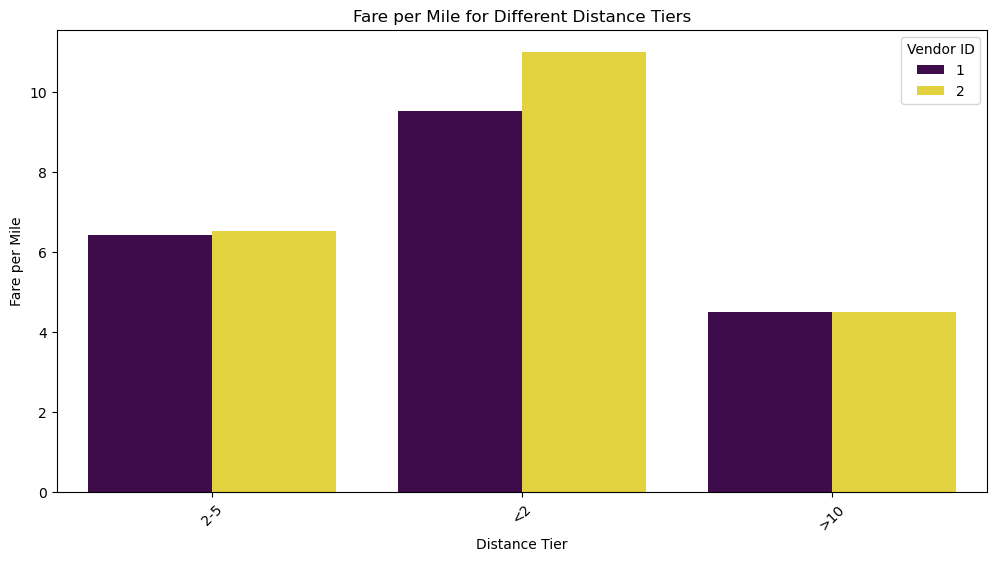

In [424]:
# Defining distance tiers

#Compare fare per mile for different distance tiers
# Define distance tiers 
#<2, 2-5,>10
def distance_tier(row):
    if row['trip_distance'] < 2:
        return '<2'
    elif 2 <= row['trip_distance'] <= 5:
        return '2-5'
    else:
        return '>10'

#Compare fare per mile for different distance tiers for different vendors
# Apply the function to create a new column
df_non_zero['distance_tier'] = df_non_zero.apply(distance_tier, axis=1)
# Group by distance tier and calculate average fare per mile
distance_tier_fare_per_mile = df_non_zero.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().reset_index()
# Display the fare per mile for different distance tiers
distance_tier_fare_per_mile.head(10)
# Plot the fare per mile for different distance tiers
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=distance_tier_fare_per_mile, palette='viridis')
plt.title('Fare per Mile for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile')
plt.legend(title='Vendor ID')
plt.xticks(rotation=45)
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

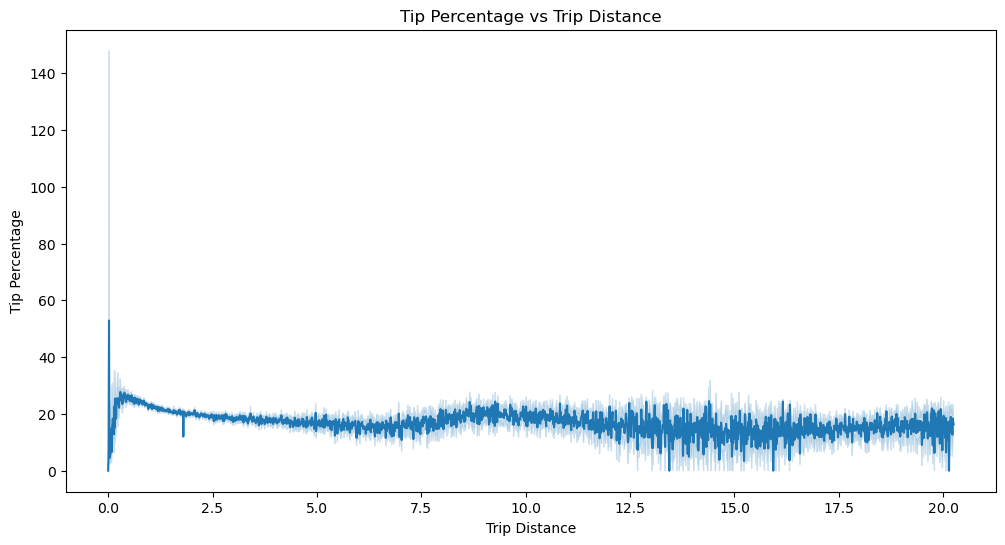

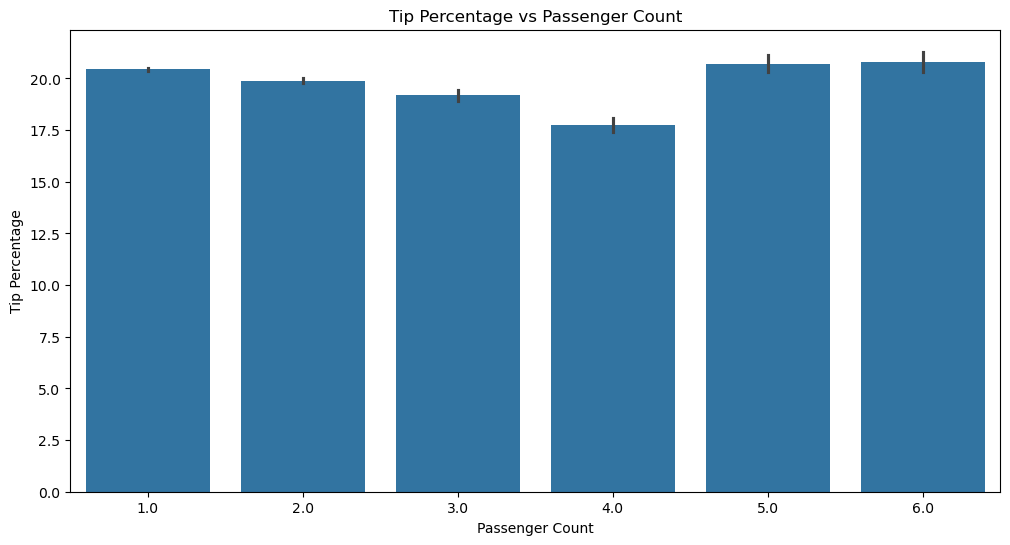

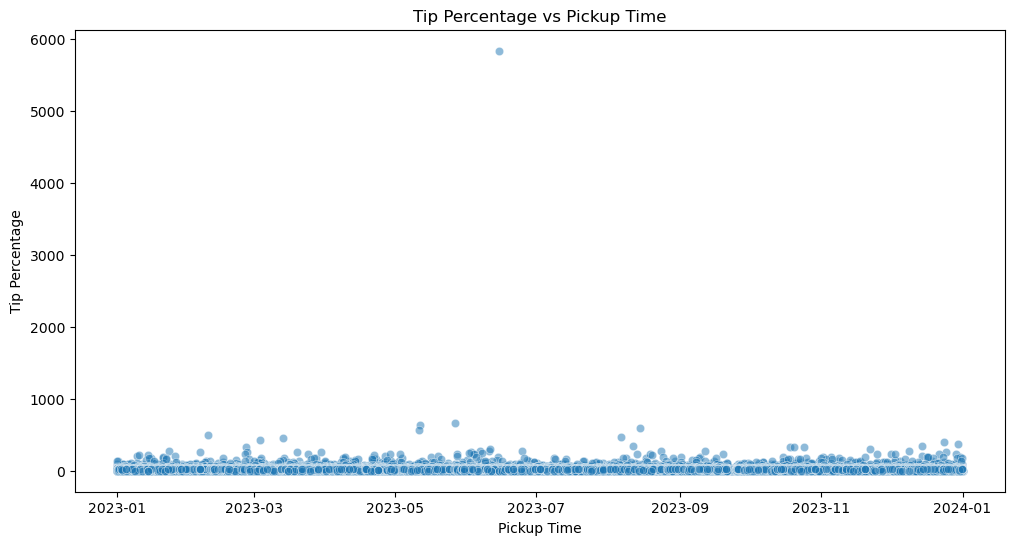

In [425]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df['tip_percentage'] = df['tip_amount'] / df['fare_amount'] * 100

#Replace null values with 0
df['tip_percentage'] = df['tip_percentage'].fillna(0)

# Group by distance, passenger count and pickup time
tip_analysis = df.groupby(['trip_distance', 'passenger_count', 'tpep_pickup_datetime']).agg({'tip_percentage': 'mean'}).reset_index()

#Visualise the tip percentage distribution vs trip distance
plt.figure(figsize=(12, 6))
sns.lineplot(x='trip_distance', y='tip_percentage', data=tip_analysis)
plt.title('Tip Percentage vs Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')

plt.show()
#Visualise the tip percentage distribution vs passenger count
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='tip_percentage', data=tip_analysis)
plt.title('Tip Percentage vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

#Visualise the tip percentage distribution vs pickup time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tpep_pickup_datetime', y='tip_percentage', data=tip_analysis, alpha=0.5)
plt.title('Tip Percentage vs Pickup Time')
plt.xlabel('Pickup Time')
plt.ylabel('Tip Percentage')
plt.show()




In [366]:
df.isna().sum()

tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_fee                 0
trip_duration               0
OBJECTID                 3546
Shape_Leng               3546
Shape_Area               3546
zone                     3546
LocationID               3546
borough                  3546
geometry                 3546
tip_percentage           1931
dtype: int64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_13566/1421287132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tpep_pickup_datetime', y='passenger_count', data=hourly_passenger_count, palette='viridis')


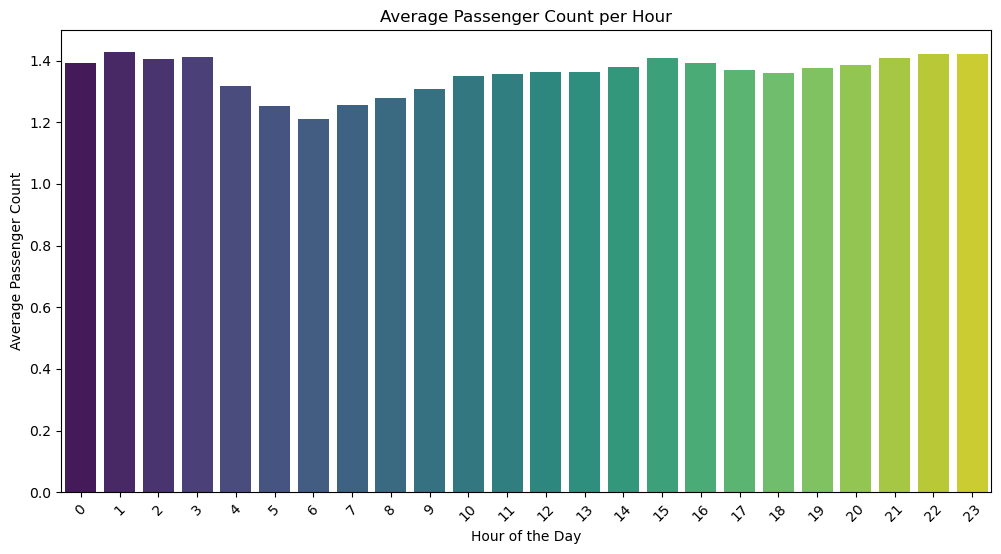

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_13566/1421287132.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tpep_pickup_datetime', y='passenger_count', data=daily_passenger_count, palette='viridis')


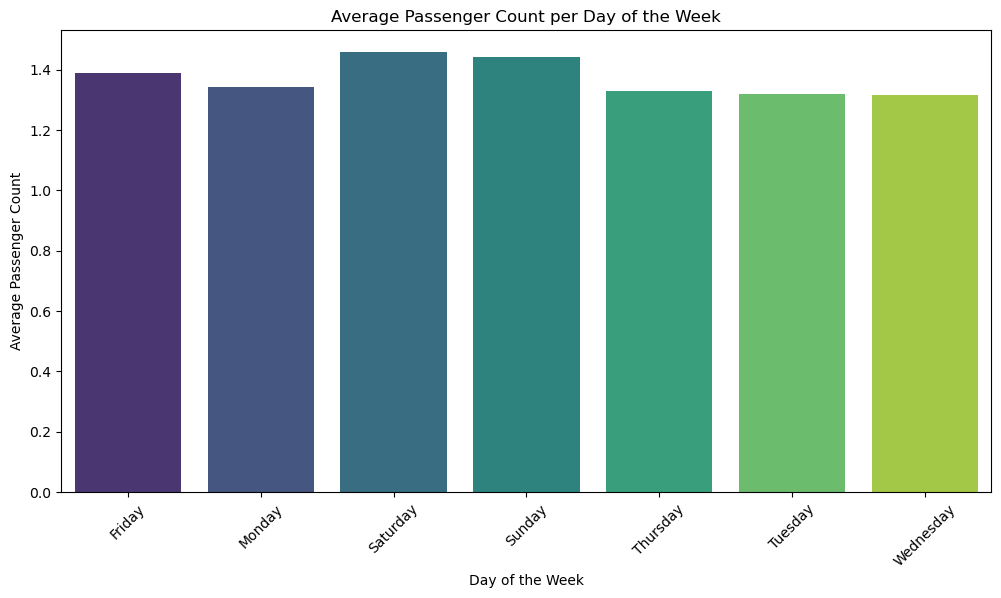

In [370]:
# See how passenger count varies across hours and days

# Group data by hour and passenger count
hourly_passenger_count = df.groupby(df['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean().reset_index()

# Plot the hourly passenger count
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='passenger_count', data=hourly_passenger_count, palette='viridis')
plt.title('Average Passenger Count per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()

# Group data by day of week and passenger count
daily_passenger_count = df.groupby(df['tpep_pickup_datetime'].dt.day_name())['passenger_count'].mean().reset_index()
# Plot the daily passenger count
plt.figure(figsize=(12, 6))
sns.barplot(x='tpep_pickup_datetime', y='passenger_count', data=daily_passenger_count, palette='viridis')
plt.title('Average Passenger Count per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_13566/3939879461.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='PULocationID', y='passenger_count', data=pickup_zone_passenger_count, palette='viridis')


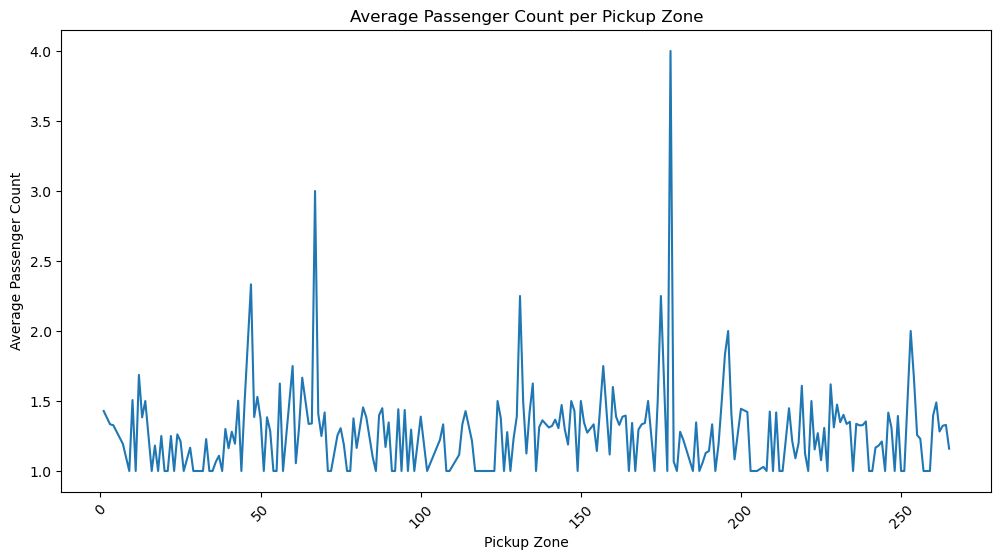

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_13566/3939879461.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='DOLocationID', y='passenger_count', data=dropoff_zone_passenger_count, palette='viridis')


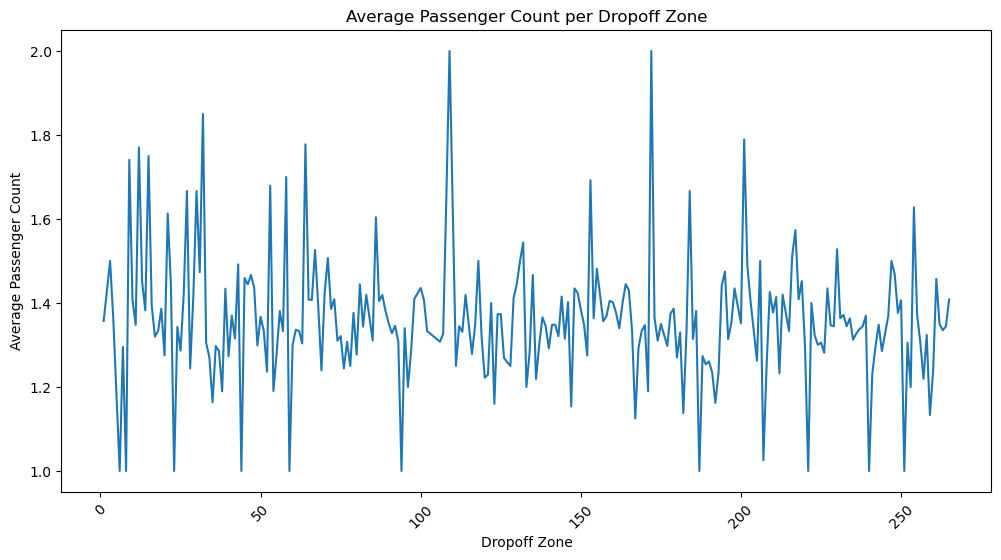

In [373]:
# How does passenger count vary across zones

#Group data by pickup and dropoff zones
pickup_zone_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
dropoff_zone_passenger_count = df.groupby('DOLocationID')['passenger_count'].mean().reset_index()

# Plot the pickup zone passenger count
plt.figure(figsize=(12, 6))
sns.lineplot(x='PULocationID', y='passenger_count', data=pickup_zone_passenger_count, palette='viridis')
plt.title('Average Passenger Count per Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()

# Plot the dropoff zone passenger count
plt.figure(figsize=(12, 6))
sns.lineplot(x='DOLocationID', y='passenger_count', data=dropoff_zone_passenger_count, palette='viridis')
plt.title('Average Passenger Count per Dropoff Zone')
plt.xlabel('Dropoff Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_13566/495698450.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='zone', y='average_passenger_count', data=zones, palette='viridis')


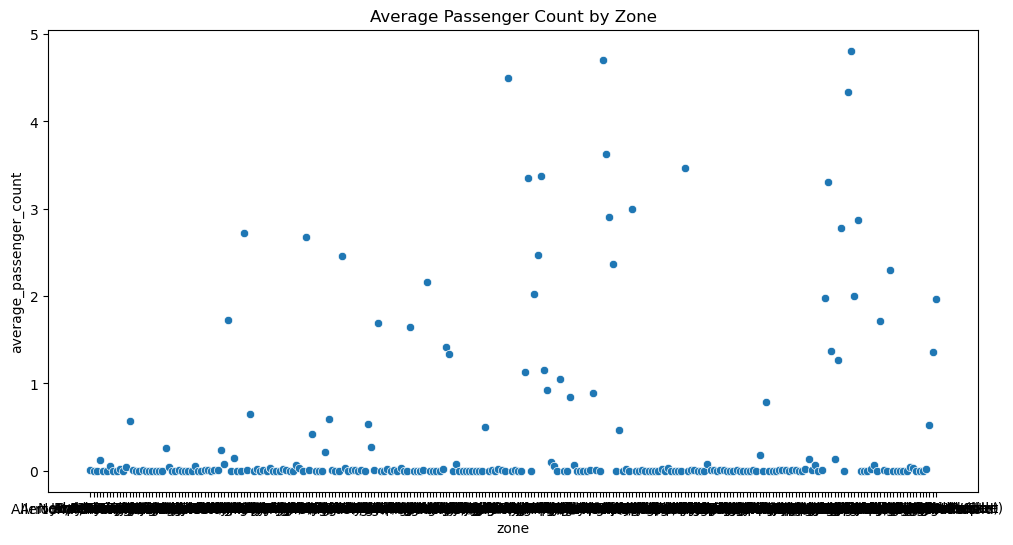

In [380]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones['average_passenger_count'] = zones['pickup_count'] / zones['pickup_count'].sum() * 100
# Plot the average passenger count by zone
plt.figure(figsize=(12, 6))
sns.scatterplot(x='zone', y='average_passenger_count', data=zones, palette='viridis')
plt.title('Average Passenger Count by Zone')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1237655408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PULocationID', y='extra', data=df, palette='viridis')


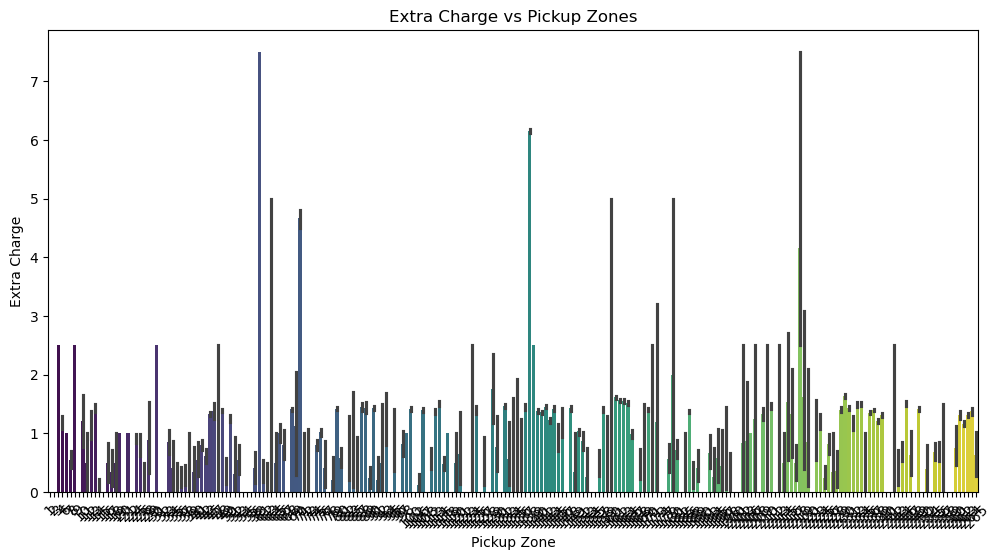

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1237655408.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DOLocationID', y='extra', data=df, palette='viridis')


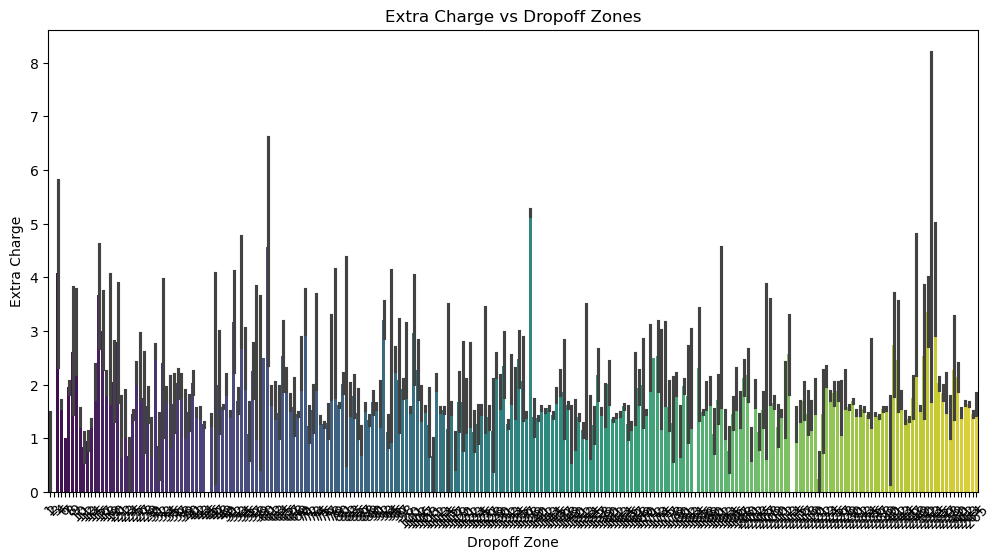

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1237655408.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tpep_pickup_datetime', y='extra', data=df, palette='viridis')


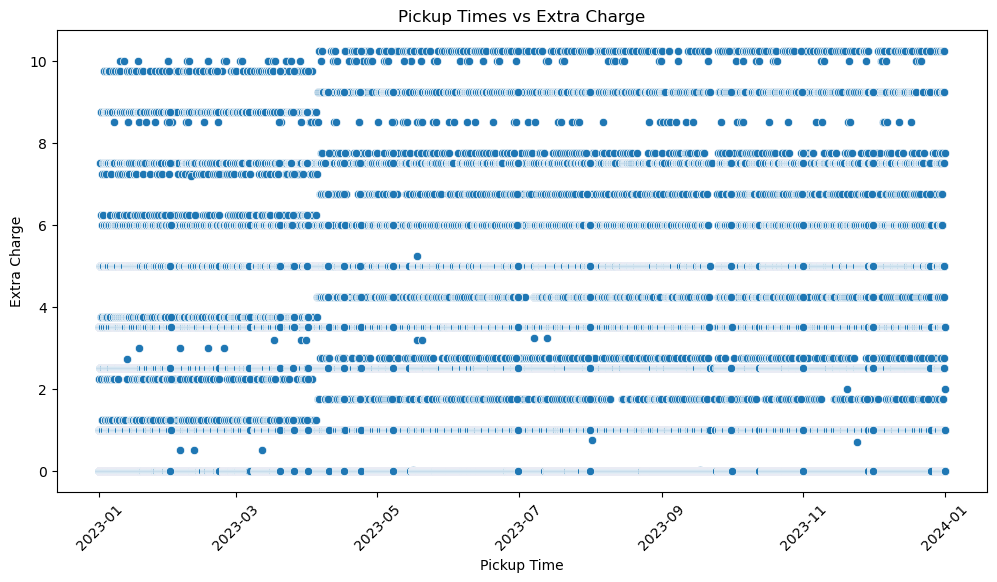

/var/folders/rb/p0ltf7b91nz745q_51fwpy711fr2g9/T/ipykernel_77420/1237655408.py:32: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tpep_dropoff_datetime', y='extra', data=df, palette='viridis')


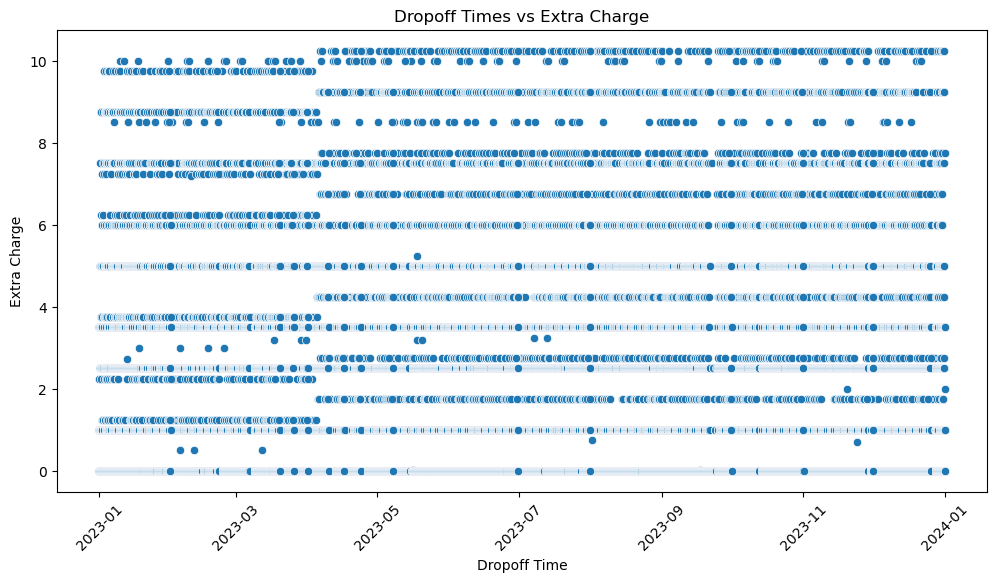

In [426]:
# How often is each surcharge applied?

# Plot the extra charge vs pickup zones
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='extra', data=df, palette='viridis')
plt.title('Extra Charge vs Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Extra Charge')
plt.xticks(rotation=45)
plt.show()

# Plot the extra charge vs dropoff zones
plt.figure(figsize=(12, 6))
sns.barplot(x='DOLocationID', y='extra', data=df, palette='viridis')
plt.title('Extra Charge vs Dropoff Zones')
plt.xlabel('Dropoff Zone')
plt.ylabel('Extra Charge')
plt.xticks(rotation=45)
plt.show()

#Plot the pickup times vs extra charge
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tpep_pickup_datetime', y='extra', data=df, palette='viridis')
plt.title('Pickup Times vs Extra Charge')
plt.xlabel('Pickup Time')
plt.ylabel('Extra Charge')
plt.xticks(rotation=45)
plt.show()

# Plot the dropoff times vs extra charge
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tpep_dropoff_datetime', y='extra', data=df, palette='viridis')
plt.title('Dropoff Times vs Extra Charge')
plt.xlabel('Dropoff Time')
plt.ylabel('Extra Charge')
plt.xticks(rotation=45)
plt.show()




## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.